In [4]:
import pandas as pd 
import uuid
import numpy as np
from scipy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm 
from nfft import nfft
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
#from matplotlib.legend_handler import HandlerPatch


%matplotlib inline


In [11]:
plt.rcParams["figure.figsize"] = (15,15)


In [17]:
calin=clean2("pop2.txt")


[array([ 0.58198553,  5.87285672, 29.36487388, ..., -4.7994251 ,
         0.57143643,  5.98718542]),
 array([-2.07288150e+00, -2.08965547e+01, -1.04266176e+02, ...,
        -3.16996260e-08,  7.31084110e-07,  1.32180129e-06]),
 array([ -0.28621162,  -2.88916618, -14.38690033, ...,  -0.02079624,
          0.27069447,   0.789365  ]),
 array([-2.07288150e+00, -2.08965547e+01, -1.04266176e+02, ...,
        -3.16996260e-08,  7.31084110e-07,  1.32180129e-06]),
 array([  -2.0728815 ,  -20.89655471, -104.26617578, ..., -192.47545196,
        -178.64119034, -163.24082081]),
 array([-0.10864245, -1.08116375, -5.31656601, ..., -0.19068808,
         2.50248201,  5.2409382 ]),
 array([  -2.0728815 ,  -20.89655471, -104.26617578, ...,    2.6452211 ,
           4.66270309,    6.65037124]),
 array([  -2.0728815 ,  -20.89655471, -104.26617578, ...,   -4.84098915,
          -4.94723878,   -4.89205819])]

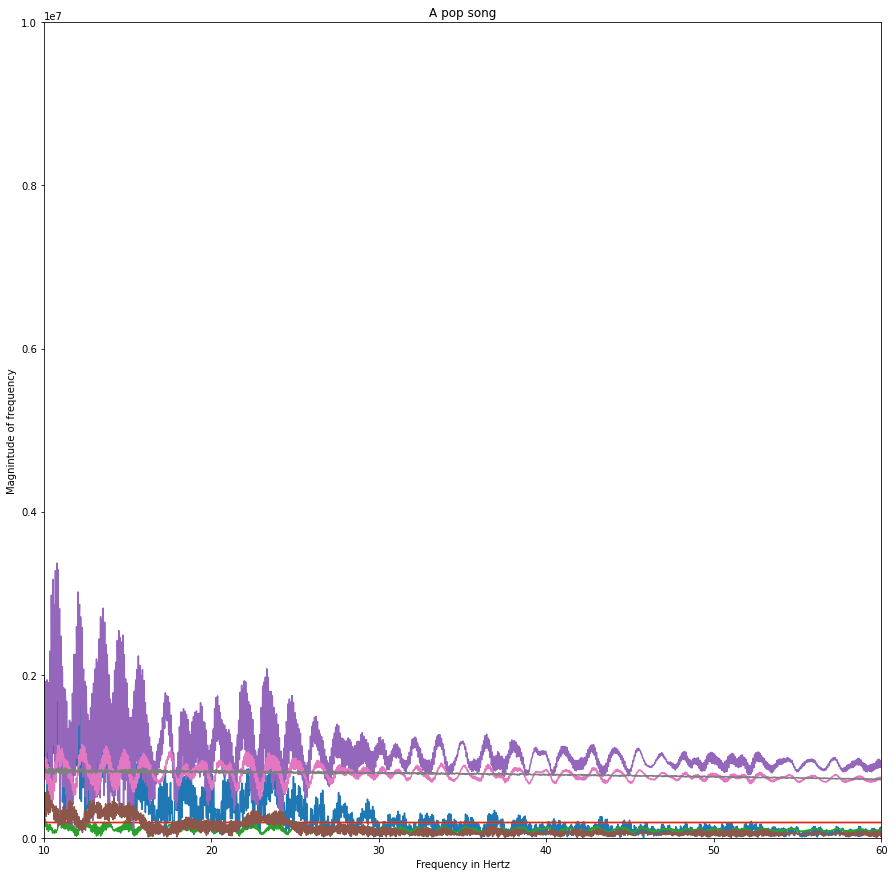

In [18]:
fft_filter(calin,"A pop song")

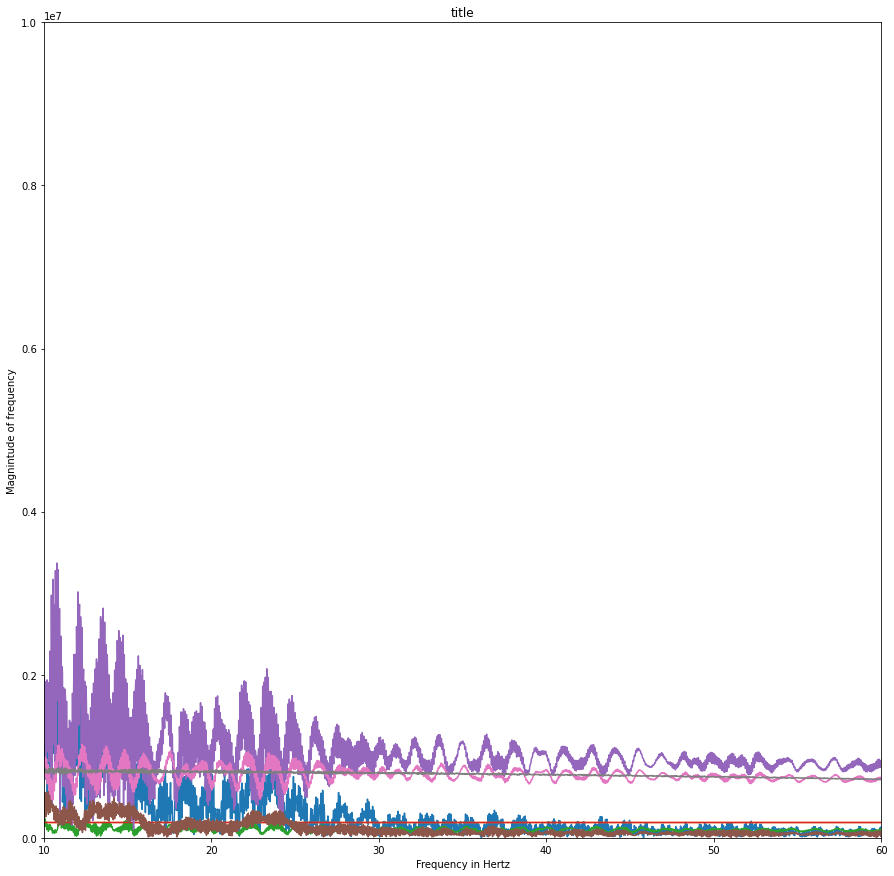

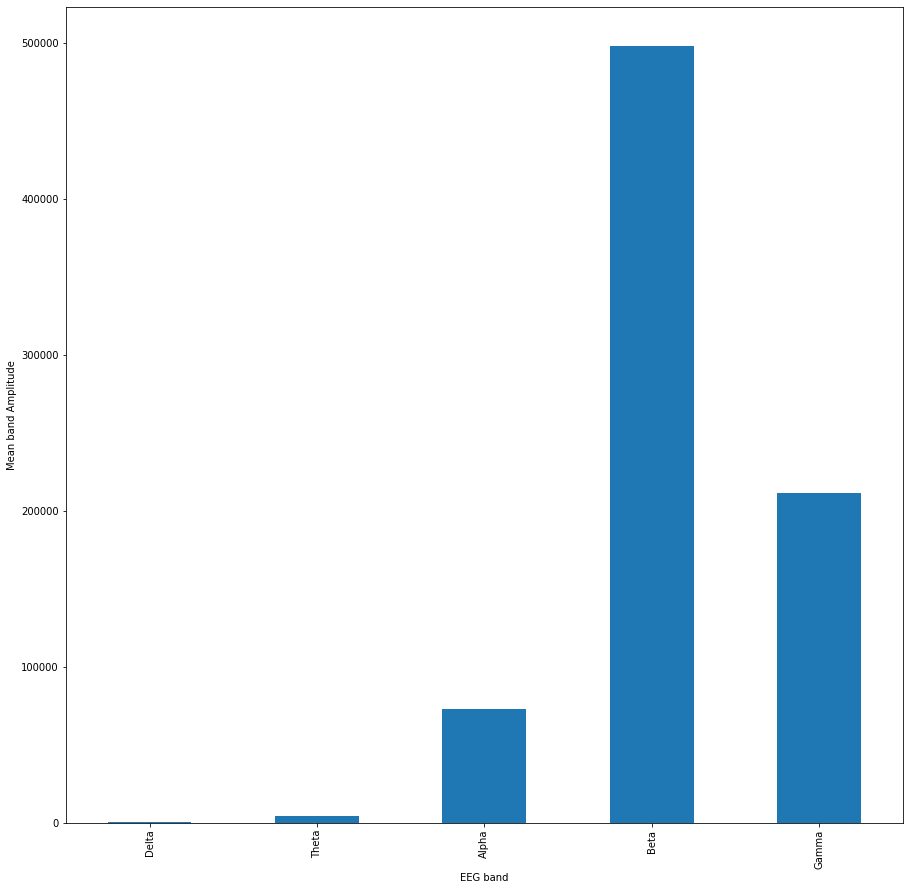

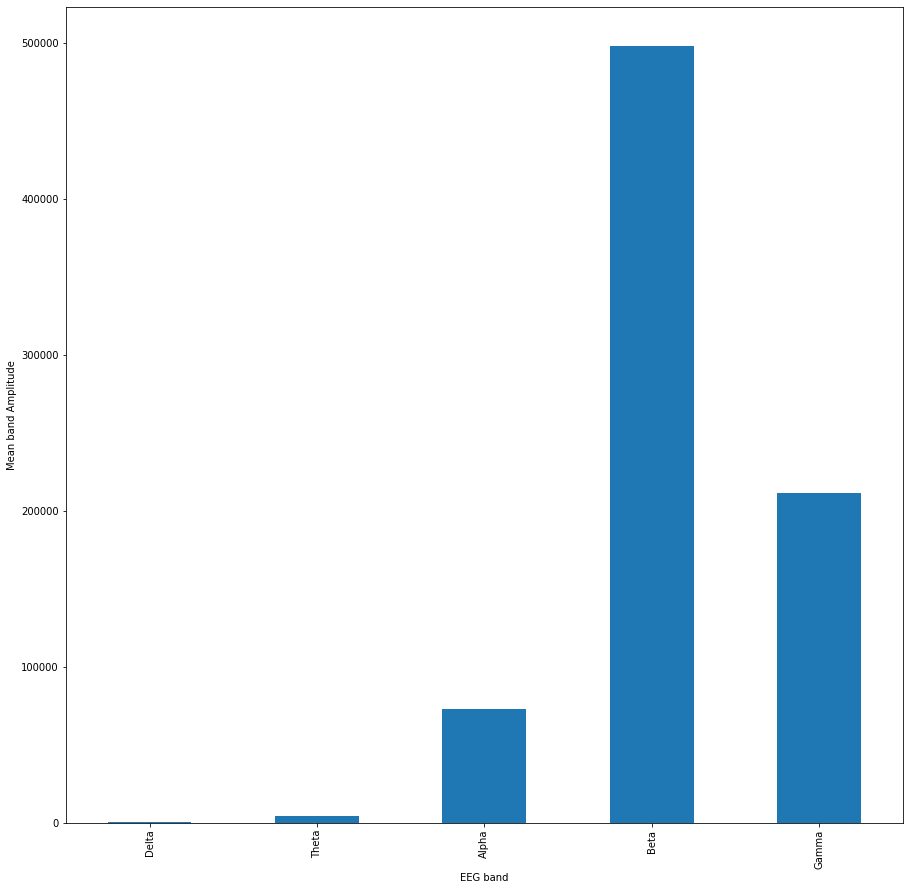

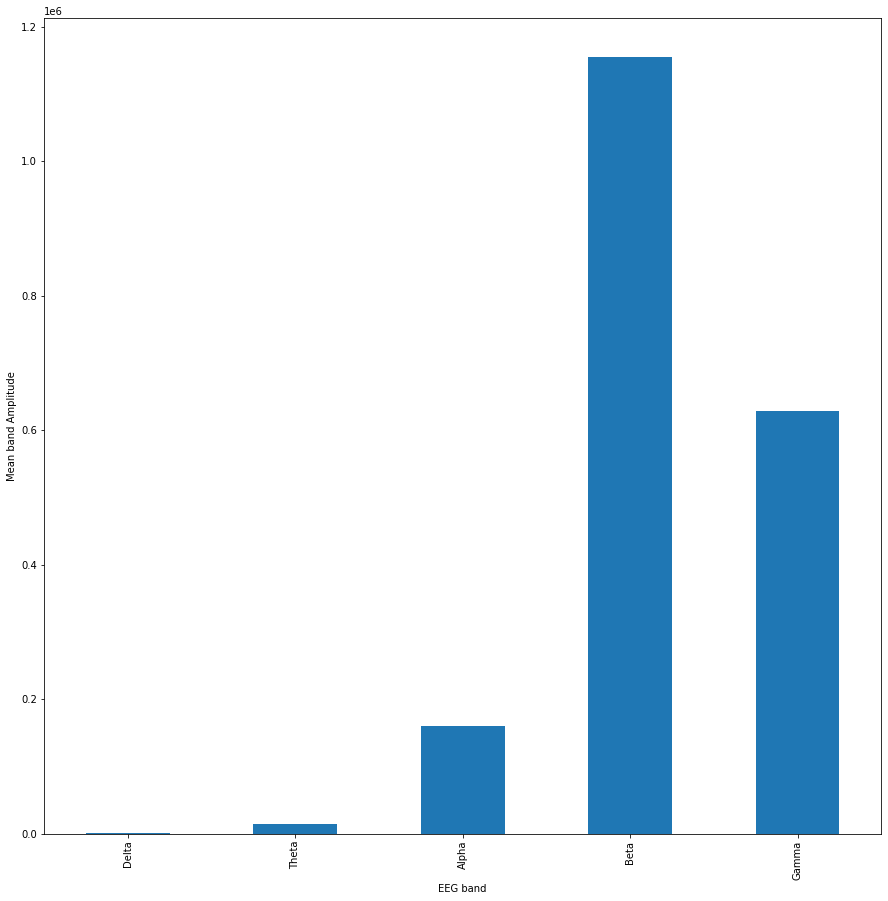

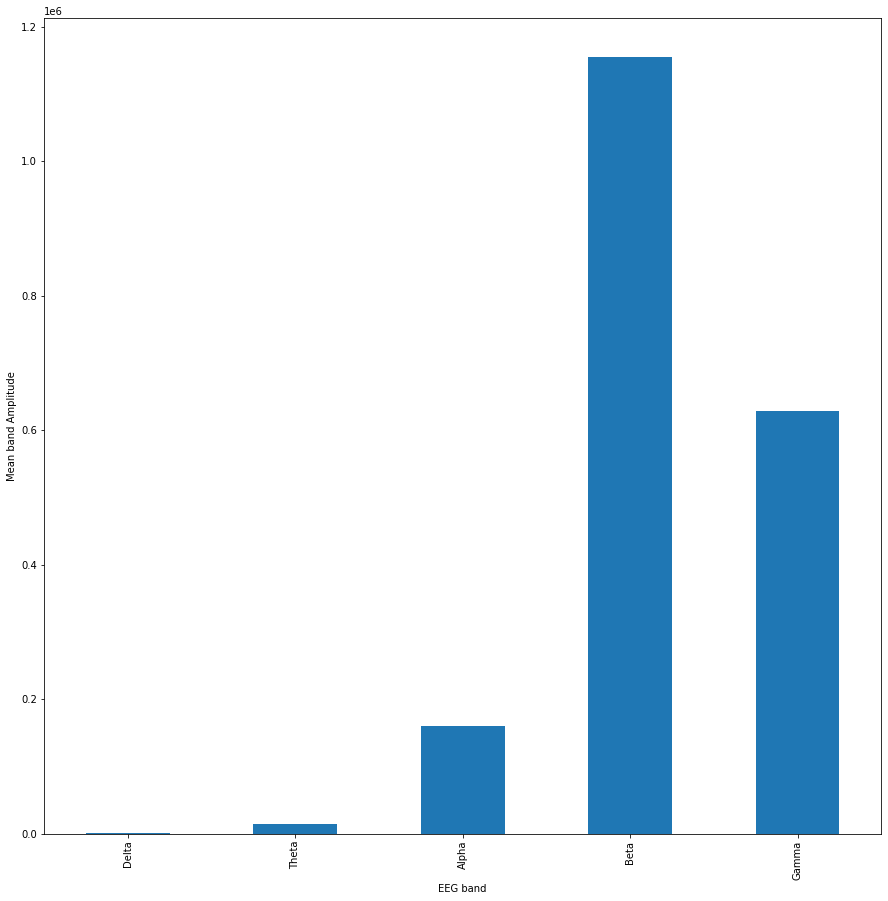

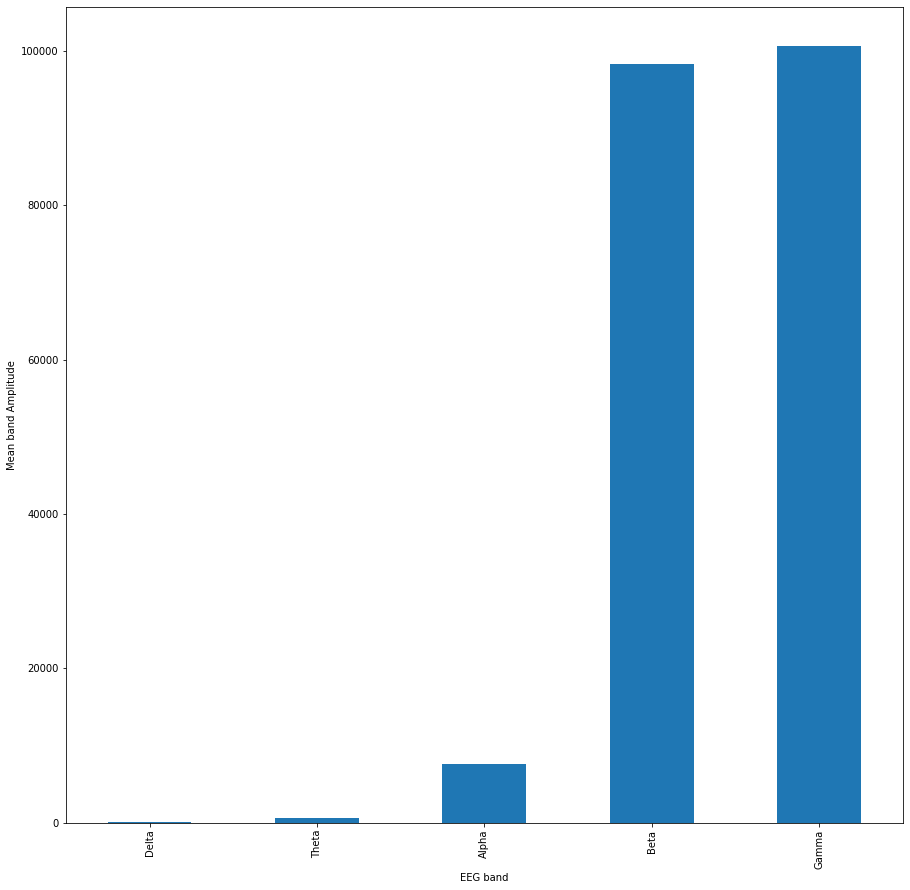

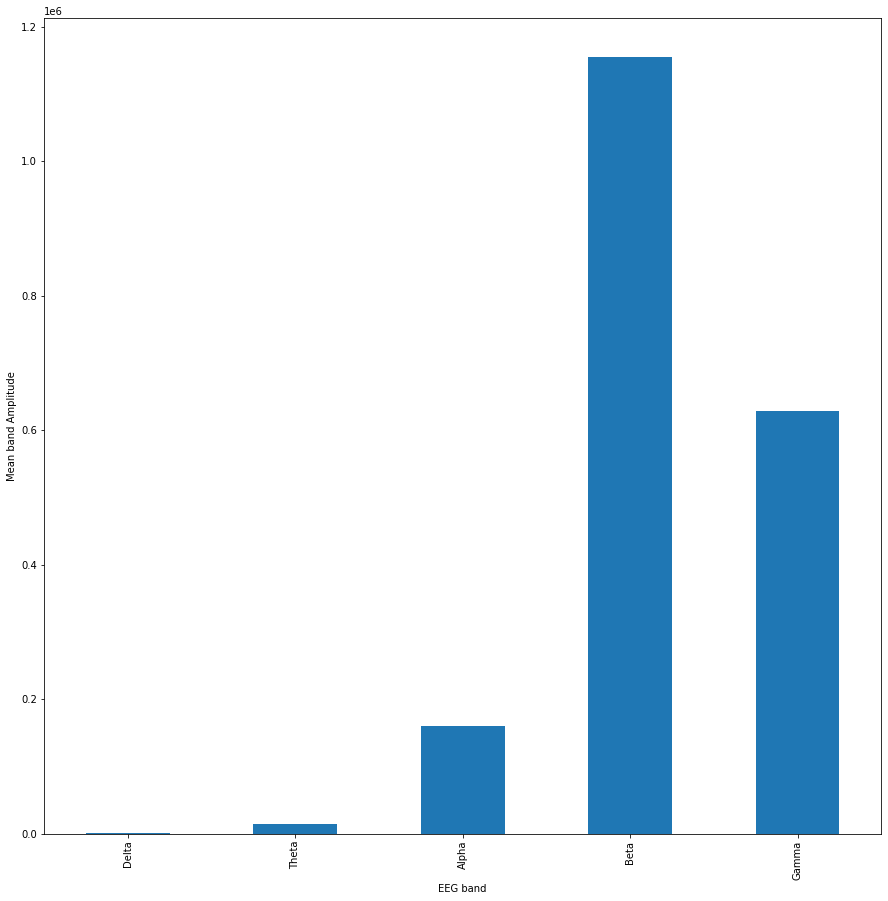

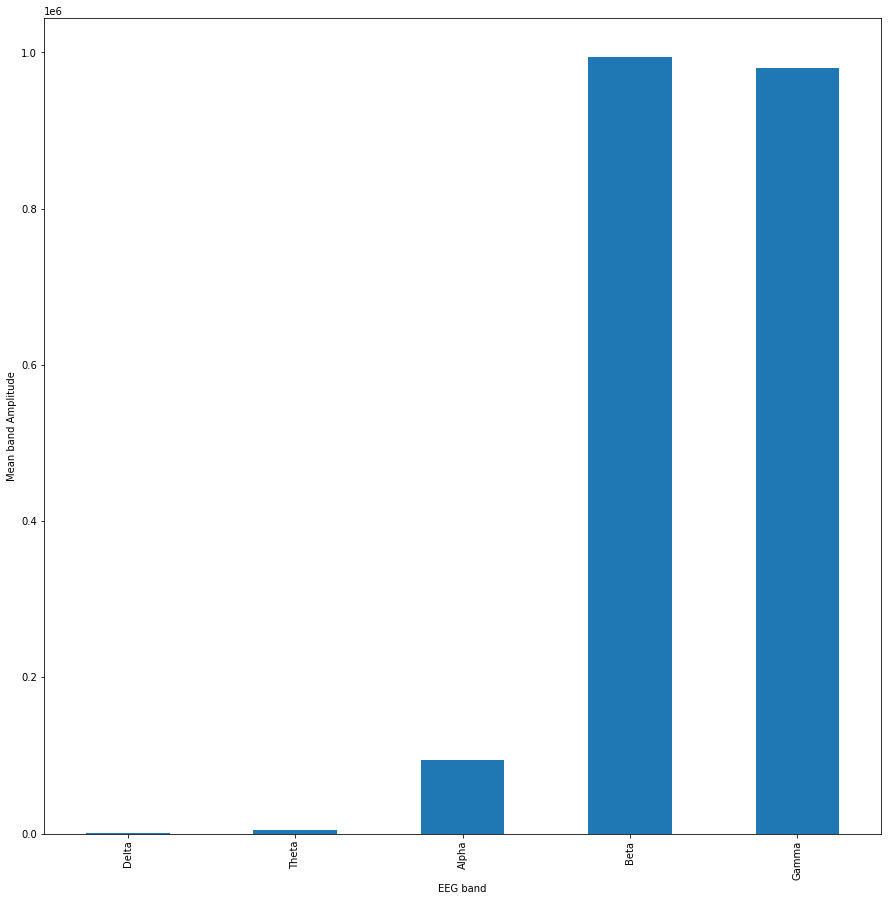

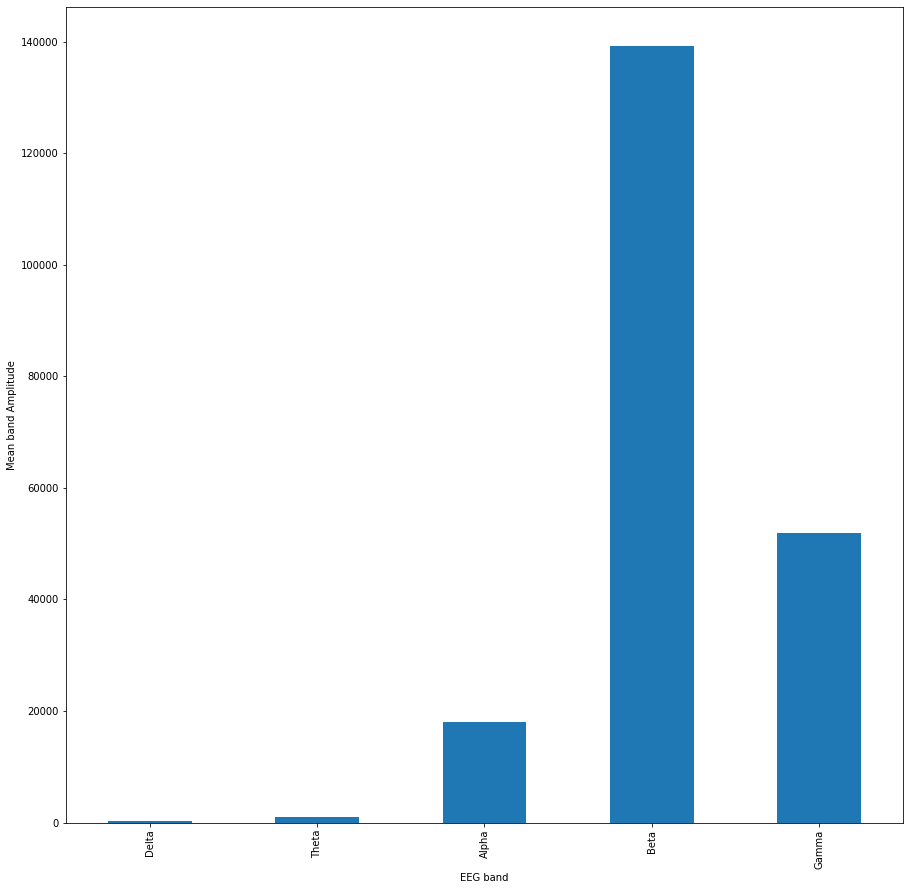

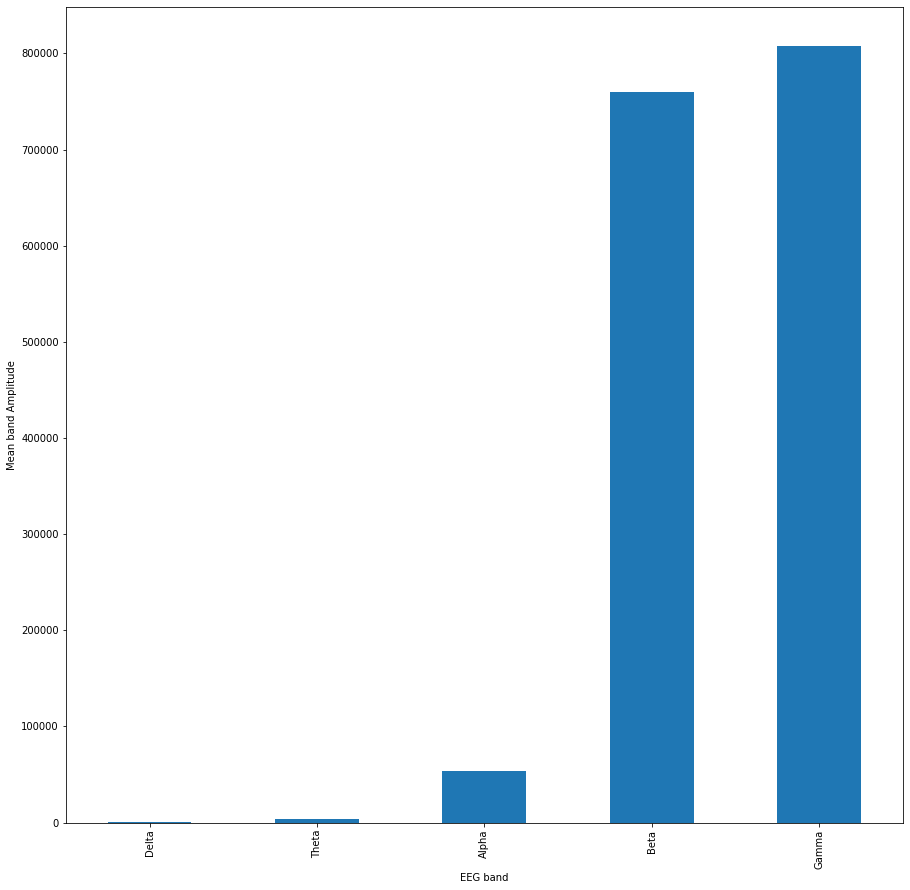

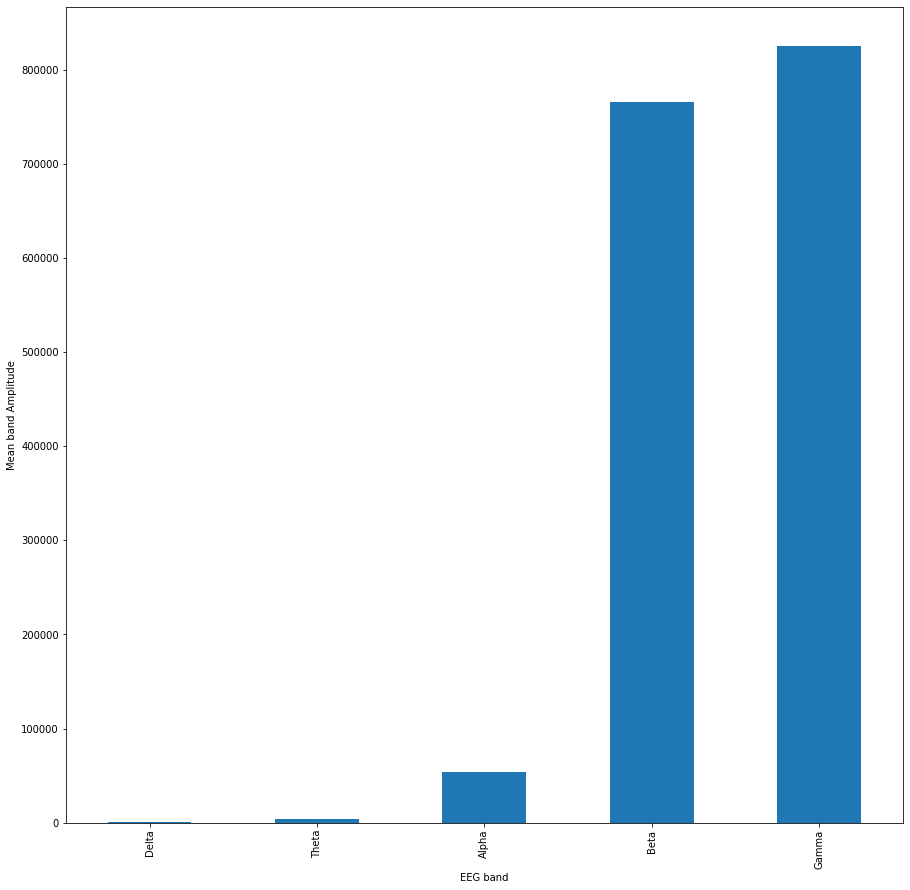

In [33]:
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(calin,"title"))
vectorcalin=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,0)

In [34]:
print(vectorcalin)

    band           val   Sensor  Label
0  Delta  4.896377e+02  sensor1      0
1  Theta  4.204074e+03  sensor1      0
2  Alpha  7.267594e+04  sensor1      0
3   Beta  4.979211e+05  sensor1      0
4  Gamma  2.114857e+05  sensor1      0
0  Delta  3.748040e+02  sensor2      0
1  Theta  1.468723e+04  sensor2      0
2  Alpha  1.604730e+05  sensor2      0
3   Beta  1.155225e+06  sensor2      0
4  Gamma  6.284047e+05  sensor2      0
0  Delta  1.048481e+02  sensor3      0
1  Theta  6.334252e+02  sensor3      0
2  Alpha  7.645692e+03  sensor3      0
3   Beta  9.830268e+04  sensor3      0
4  Gamma  1.006329e+05  sensor3      0
0  Delta  3.748040e+02  sensor4      0
1  Theta  1.468723e+04  sensor4      0
2  Alpha  1.604730e+05  sensor4      0
3   Beta  1.155225e+06  sensor4      0
4  Gamma  6.284047e+05  sensor4      0
0  Delta  1.080542e+03  sensor5      0
1  Theta  5.173872e+03  sensor5      0
2  Alpha  9.451421e+04  sensor5      0
3   Beta  9.942218e+05  sensor5      0
4  Gamma  9.797070e+05  s

TypeError: make_vector() missing 8 required positional arguments: 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', and 'exp'

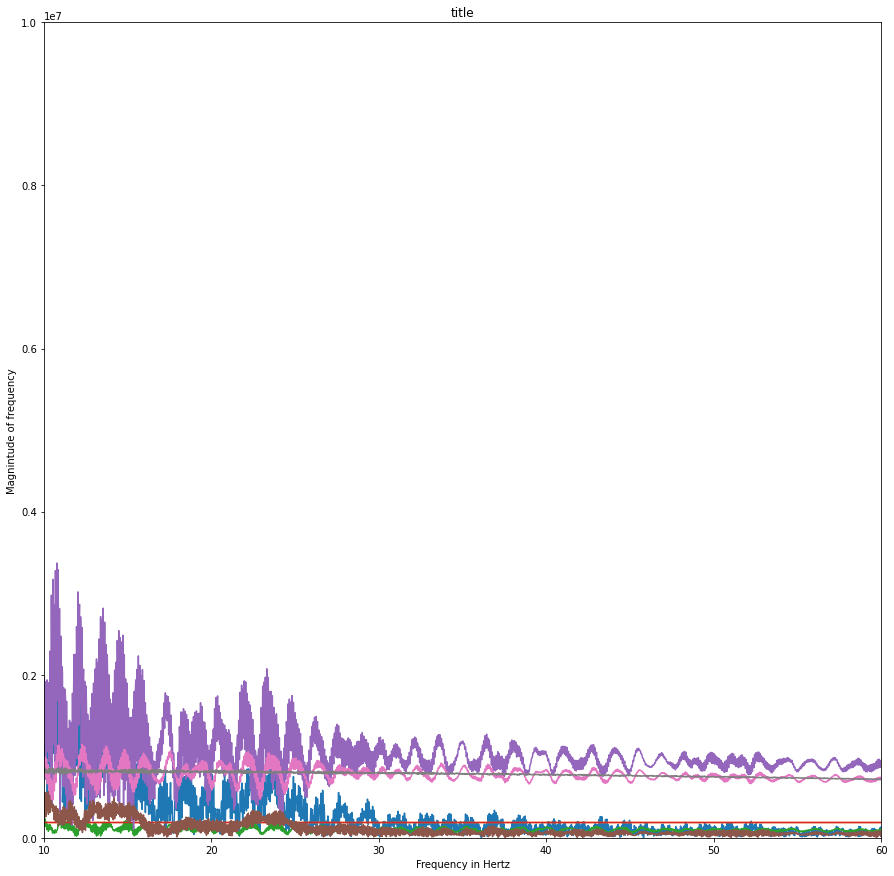

In [2]:
def clean1(filename): 
    data=pd.read_csv(filename,skiprows=4)
    data.columns=data.columns.str.strip()
    return data

def clean2(filename):
    data=pd.read_csv(filename, sep=",", header=None,skiprows=5).values
    
    
    return data
    

figsize=(20,20)

[array([ 0.48905758,  4.92986865, 24.59637875, ...,  0.85249631,
        -0.04371902, -0.62515844]),
 array([ 0.56349305,  5.6807681 , 28.3466001 , ...,  9.83247436,
         8.74019011,  7.34843219]),
 array([ 0.4420947 ,  4.45784237, 22.25142691, ..., -3.74146615,
        -1.85755749,  0.33876484]),
 array([  0.63597686,   6.41175913,  32.0008383 , ..., -14.2465054 ,
        -15.13441477, -14.73646445]),
 array([  0.66275384,   6.67838624,  33.31520819, ..., -10.0703368 ,
        -11.55576339, -11.75686843]),
 array([ 0.6401972 ,  6.45423061, 32.2092757 , ..., -3.23648039,
        -3.77258391, -3.49461959]),
 array([ 0.18712009,  1.88728803,  9.42217769, ...,  0.49228483,
        -0.42102307, -1.3631156 ]),
 array([ 0.05204611,  0.52595747,  2.6343486 , ..., -5.52712   ,
        -6.71389357, -6.98988257])]

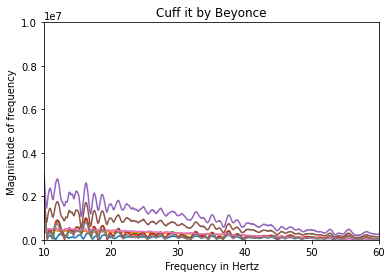

In [118]:
bey=clean2("popbey.txt")
fft_filter(bey,"Cuff it by Beyonce")

In [7]:
def plotRawDataVsTime(data):
    fig, axs = plt.subplots(8)
    fig.suptitle('Raw Voltage Versus time')
    for i in range(8): 
        axs[i].set_ylabel("Voltage")
        axs[i].set_xlabel("Time")
    axs[0].plot(data["EXG Channel 0"])
    
    axs[1].plot(data["EXG Channel 1"])
    axs[2].plot(data["EXG Channel 2"])
    axs[3].plot(data["EXG Channel 3"])
    axs[4].plot(data["EXG Channel 4"])
    axs[5].plot(data["EXG Channel 5"])
    axs[6].plot(data["EXG Channel 6"])
    axs[7].plot(data["EXG Channel 7"])
    
    #axs[0].set_ylabel("Voltage")
    
   
    

In [27]:
class OpenBCI(): 
    def __init__(self):
        self.data = { "ch01":[], "ch02":[], "ch03":[], "ch04":[], \
                      "ch05":[], "ch06":[], "ch07":[], "ch08":[] }
        self.time = []

    # def loadBCIData(self,filename) # one possible function to include

    
    def plotRawDataVsTime(data):
        fig, axs = plt.subplots(8)
        fig.suptitle('Raw Voltage Versus time')
        for i in range(8): 
            axs[i].set_ylabel("Voltage")
            axs[i].set_xlabel("Time")
        axs[0].plot(data["EXG Channel 0"])

        axs[1].plot(data["EXG Channel 1"])
        axs[2].plot(data["EXG Channel 2"])
        axs[3].plot(data["EXG Channel 3"])
        axs[4].plot(data["EXG Channel 4"])
        axs[5].plot(data["EXG Channel 5"])
        axs[6].plot(data["EXG Channel 6"])
        axs[7].plot(data["EXG Channel 7"])
        
        
        
        


    
    

In [28]:
def compute_nfft(sample_instants, sample_values):
    
    N = len(sample_instants)
    T = sample_instants[-1] - sample_instants[0]
    x = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    y = nfft(sample_instants, sample_values)
    y = 2.0 / N * np.abs(y[0:N // 2])
    return (x, y)

In [29]:
def check_time():
    dt=[]
    for i in range(100,200):
        dt.append(constant3[i+1]-constant3[i]) 
    plt.plot(dt)

In [9]:
def raw_plot(data):
    plt.title("Voltage Versus Time Graph")
    plt.xlabel("Time")
    plt.ylabel("Microvolts")
    plt.plot(data["EXG Channel 0"])
    plt.plot(data["EXG Channel 1"])
    plt.plot(data["EXG Channel 2"])
    plt.plot(data["EXG Channel 3"])
    plt.plot(data["EXG Channel 4"])
    plt.plot(data["EXG Channel 5"])
    plt.plot(data["EXG Channel 6"])
    plt.plot(data["EXG Channel 7"]) 
    
    
def raw_plot_interval(data,lim1,lim2,Title):
    plt.title(Title+ "Voltage Versus Time Graph")
    plt.xlabel("Time")
    plt.ylabel("Microvolts")
    plt.plot(data["EXG Channel 0"])
    plt.plot(data["EXG Channel 1"])
    plt.plot(data["EXG Channel 2"])
    plt.plot(data["EXG Channel 3"])
    plt.plot(data["EXG Channel 4"])
    plt.plot(data["EXG Channel 5"])
    plt.plot(data["EXG Channel 6"])
    plt.plot(data["EXG Channel 7"])
    plt.xlim(lim1,lim2,)


In [13]:
fs = 1000
band = (15,50) 

def notch(val, data, fs= 200):
    notch_freq_Hz = np.array([float(val)])
    for freq_Hz in np.nditer(notch_freq_Hz):
        bp_stop_Hz = freq_Hz + 3.0 * np.array([-1, 1])
        b, a = signal.butter(3, bp_stop_Hz / (fs / 2.0), 'bandstop')
        fin = data = signal.lfilter(b, a, data)
    return fin 

def bandpass(start, stop, data, fs = 200):
    bp_Hz = np.array([start, stop])
    b, a = signal.butter(5, bp_Hz / (fs / 2.0), btype='bandpass')
    return signal.lfilter(b, a, data, axis=0) 

def fft(data, fs):
    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * fs **-1), L // 2)
    yi = np.fft.fft(data)[1:]
    y = yi[range(int(L / 2))]
    return freq, abs(y)


In [32]:
def fft2(data, fs):
    N = 10000
    k = - N // 2 + np.arange(N)
    f_k = np.random.randn(N)

    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * fs **-1), L // 2)
    yi = nfft.nfft(data["EXG Channel 0"])
    y = yi[range(int(L / 2))]
    return freq, abs(y)


In [14]:
def fft_filter(data,title):
    
    channels = []
    
    bandpass_channels = []
    bandpass_notch_channels = []
    notch_channels = [] 
    fs = 1000
    band = (15,50)
    
    for i in range(8):
        channels.append(data[:,1+i].astype(np.float))
    t = len(channels[0])/fs
    time = np.linspace(0, t, len(channels[0])) 
   
    
    
    
    for i in range(len(channels)):
        notch_channels.append(notch(60,channels[i], fs = fs))
    
    #for i in range(len(notch_channels)):
        #plt.plot(time, notch_channels[i])
    
    
    for i in range(len(channels)):
        bandpass_channels.append(bandpass(band[0],band[1],channels[i], fs = fs))
    
    for i in range(len(notch_channels)):
        bandpass_notch_channels.append(bandpass(band[0],band[1],notch_channels[i], fs = fs)) 
        
        
    
    for i in range(len(channels)):
            freq, y = fft(channels[i], fs)
            plt.plot(freq, y)
            plt.ylabel("Magnintude of frequency")
            plt.xlabel("Frequency in Hertz")
    plt.title(title)
    plt.ylim(0, 1e7)
    plt.xlim(10,60) 
    
    return bandpass_notch_channels
    
    

In [34]:
def fft_filter2(data,title,t2p):
    
    channels = []
    
    bandpass_channels = []
    bandpass_notch_channels = []
    notch_channels = [] 
    fs = 1000
    band = (15,50)
    
    for i in range(8):
        channels.append(data[:,1+i].astype(np.float))
    t = len(channels[0])/fs
    time = t2p
   
    
    
    
    for i in range(len(channels)):
        notch_channels.append(notch(60,channels[i], fs = fs))
    
    #for i in range(len(notch_channels)):
        #plt.plot(time, notch_channels[i])
    
    
    for i in range(len(channels)):
        bandpass_channels.append(bandpass(band[0],band[1],channels[i], fs = fs))
    
    for i in range(len(notch_channels)):
        bandpass_notch_channels.append(bandpass(band[0],band[1],notch_channels[i], fs = fs)) 
        
        
    
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        plt.plot(freq, y)
        plt.ylabel("Magnintude of frequency")
        plt.xlabel("Frequency in Hertz")
        plt.title(title)
    plt.ylim(0, 1e7)
    plt.xlim(10,60) 
    
    return bandpass_notch_channels

[array([ 0.50645463,  5.11332491, 25.54217389, ..., -7.85563001,
        -6.67595423, -5.35314252]),
 array([ 0.57546858,  6.02075525, 31.09877338, ..., 28.21947071,
        21.04321594, 13.84199176]),
 array([ 0.16709555,  1.6708266 ,  8.2558844 , ..., -7.71089384,
        -6.02453985, -4.21383128]),
 array([ 0.11373606,  1.27491471,  6.94054067, ..., -6.99369886,
        -8.38880061, -9.14725051]),
 array([  0.44875151,   4.65535847,  23.82349064, ..., -10.14845102,
        -10.61310431, -10.43351874]),
 array([ 0.61790669,  6.34732295, 32.22892902, ...,  6.09876362,
         3.71579858,  1.30888463]),
 array([ 0.05944918,  0.58836732,  2.86325182, ..., -0.86250904,
        -0.07651932,  0.74285862]),
 array([  0.2335082 ,   2.41238388,  12.25497784, ..., -10.59012042,
        -10.4750118 , -10.16736716])]

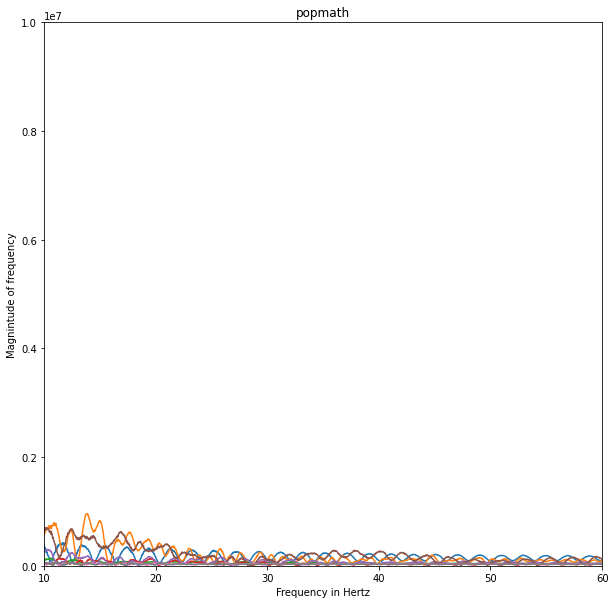

In [35]:
howl=clean2("classic1.txt")
fft_filter(howl,"popmath")

In [36]:
def plot_fft(data):
    ylim=0.1e7
    bandpass_notch_channels=data
    df1=pd.DataFrame(columns=["Frequency","y"])
    df2=pd.DataFrame(columns=["Frequency","y"])
    df3=pd.DataFrame(columns=["Frequency","y"])
    df4=pd.DataFrame(columns=["Frequency","y"])
    df5=pd.DataFrame(columns=["Frequency","y"])
    df6=pd.DataFrame(columns=["Frequency","y"])
    df7=pd.DataFrame(columns=["Frequency","y"])
    df8=pd.DataFrame(columns=["Frequency","y"])
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        if(i==0):
            df1["Frequency"]=freq
            df1["y"]=y
        elif(i==1):
            df2["Frequency"]=freq
            df2["y"]=y
        elif(i==2):
            df3["Frequency"]=freq
            df3["y"]=y
        elif(i==3):
            df4["Frequency"]=freq
            df4["y"]=y
        elif(i==4):
            df5["Frequency"]=freq
            df5["y"]=y
        elif(i==5):
            df6["Frequency"]=freq
            df6["y"]=y
        elif(i==6):
            df7["Frequency"]=freq
            df7["y"]=y
        elif(i==7):
            df8["Frequency"]=freq
            df8["y"]=y
    
    fig, ax = plt.subplots(2, 4)
    fig.suptitle('Plot of FFT ')
    ax[0, 0].set_title('Sensor 1')
    ax[0, 0].plot(df1["Frequency"], df1["y"]) #row=0, col=0
    ax[0, 0].set_ylim(0,ylim)
    ax[0, 0].set_xlim(0,60)

    ax[0, 1].set_title('Sensor 2')
    ax[0, 1].plot(df2["Frequency"], df2["y"]) #row=0, col=1
    ax[0, 1].set_ylim(0,ylim)
    ax[0, 1].set_xlim(0,60)
    
    ax[0, 2].set_title('Sensor 3')
    ax[0, 2].plot(df3["Frequency"], df3["y"]) #row=0, col=1
    ax[0, 2].set_ylim(0,ylim)
    ax[0, 2].set_xlim(0,60)
    
    ax[0, 3].set_title('Sensor 4')
    ax[0, 3].plot(df4["Frequency"], df4["y"]) #row=0, col=1
    ax[0, 3].set_ylim(0,ylim)
    ax[0, 3].set_xlim(0,60)
    
    ax[1, 0].set_title('Sensor 5')
    ax[1, 0].plot(df5["Frequency"], df5["y"]) #row=1, col=0
    ax[1, 0].set_ylim(0,ylim)
    ax[1, 0].set_xlim(0,60)
    
    ax[1, 1].set_title('Sensor 6')
    ax[1, 1].plot(df6["Frequency"], df6["y"]) #row=1, col=1
    ax[1, 1].set_ylim(0,ylim)
    ax[1, 1].set_xlim(0,60)
    
    ax[1, 2].set_title('Sensor 7')
    ax[1, 2].plot(df7["Frequency"], df7["y"]) #row=1, col=0
    ax[1, 2].set_ylim(0,ylim)
    ax[1, 2].set_xlim(0,60)
    
    ax[1, 3].set_title('Sensor 8')
    ax[1, 3].plot(df8["Frequency"], df8["y"]) #row=1, col=0
    ax[1, 3].set_ylim(0,ylim)
    ax[1, 3].set_xlim(0,60)

    plt.show()

In [26]:
def get_df1(data):
    bandpass_notch_channels=data
    df1=pd.DataFrame(columns=["Frequency","y"])
    df2=pd.DataFrame(columns=["Frequency","y"])
    df3=pd.DataFrame(columns=["Frequency","y"])
    df4=pd.DataFrame(columns=["Frequency","y"])
    df5=pd.DataFrame(columns=["Frequency","y"])
    df6=pd.DataFrame(columns=["Frequency","y"])
    df7=pd.DataFrame(columns=["Frequency","y"])
    df8=pd.DataFrame(columns=["Frequency","y"])
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        if(i==0):
            df1["Frequency"]=freq
            df1["y"]=y
        elif(i==1):
            df2["Frequency"]=freq
            df2["y"]=y
        elif(i==2):
            df3["Frequency"]=freq
            df3["y"]=y
        elif(i==3):
            df4["Frequency"]=freq
            df4["y"]=y
        elif(i==4):
            df5["Frequency"]=freq
            df5["y"]=y
        elif(i==5):
            df6["Frequency"]=freq
            df6["y"]=y
        elif(i==6):
            df7["Frequency"]=freq
            df7["y"]=y
        elif(i==7):
            df8["Frequency"]=freq
            df8["y"]=y
    fig, ax = plt.subplots(2, 4)
    ax[0, 0].set_title('Sensor 1')
    ax[0, 0].plot(df1["Frequency"], df1["y"]) #row=0, col=0
    ax[0, 0].set_ylim(0,1e7)
    ax[0, 0].set_xlim(0,60)

    ax[0, 1].set_title('Sensor 2')
    ax[0, 1].plot(df2["Frequency"], df2["y"]) #row=0, col=1
    ax[0, 1].set_ylim(0,1e7)
    ax[0, 1].set_xlim(0,60)
    
    ax[0, 2].set_title('Sensor 3')
    ax[0, 2].plot(df3["Frequency"], df3["y"]) #row=0, col=1
    ax[0, 2].set_ylim(0,1e7)
    ax[0, 2].set_xlim(0,60)
    
    ax[0, 3].set_title('Sensor 4')
    ax[0, 3].plot(df4["Frequency"], df4["y"]) #row=0, col=1
    ax[0, 3].set_ylim(0,1e7)
    ax[0, 3].set_xlim(0,60)
    
    ax[1, 0].set_title('Sensor 5')
    ax[1, 0].plot(df5["Frequency"], df5["y"]) #row=1, col=0
    ax[1, 0].set_ylim(0,1e7)
    ax[1, 0].set_xlim(0,60)
    
    ax[1, 1].set_title('Sensor 6')
    ax[1, 1].plot(df6["Frequency"], df6["y"]) #row=1, col=1
    ax[1, 1].set_ylim(0,1e7)
    ax[1, 1].set_xlim(0,60)
    
    ax[1, 2].set_title('Sensor 7')
    ax[1, 2].plot(df7["Frequency"], df7["y"]) #row=1, col=0
    ax[1, 2].set_ylim(0,1e7)
    ax[1, 2].set_xlim(0,60)
    
    ax[1, 3].set_title('Sensor 8')
    ax[1, 3].plot(df8["Frequency"], df8["y"]) #row=1, col=0
    ax[1, 3].set_ylim(0,1e7)
    ax[1, 3].set_xlim(0,60)
    
    return df7

    plt.show()

In [32]:
def get_dataframes(data):
    bandpass_notch_channels=data
    df1=pd.DataFrame(columns=["Frequency","y"])
    df2=pd.DataFrame(columns=["Frequency","y"])
    df3=pd.DataFrame(columns=["Frequency","y"])
    df4=pd.DataFrame(columns=["Frequency","y"])
    df5=pd.DataFrame(columns=["Frequency","y"])
    df6=pd.DataFrame(columns=["Frequency","y"])
    df7=pd.DataFrame(columns=["Frequency","y"])
    df8=pd.DataFrame(columns=["Frequency","y"])
    for i in range(len(bandpass_notch_channels)):
        freq, y = fft(bandpass_notch_channels[i], fs)
        if(i==0):
            df1["Frequency"]=freq
            df1["y"]=y
        elif(i==1):
            df2["Frequency"]=freq
            df2["y"]=y
        elif(i==2):
            df3["Frequency"]=freq
            df3["y"]=y
        elif(i==3):
            df4["Frequency"]=freq
            df4["y"]=y
        elif(i==4):
            df5["Frequency"]=freq
            df5["y"]=y
        elif(i==5):
            df6["Frequency"]=freq
            df6["y"]=y
        elif(i==6):
            df7["Frequency"]=freq
            df7["y"]=y
        elif(i==7):
            df8["Frequency"]=freq
            df8["y"]=y
    
    return df1, df2, df3, df4, df5, df6, df7, df8

In [29]:
def make_vector(df1,df2,df3,df4,df5,df6,df7,df8,exp): 
    
    
    
    
    
    vector=(get_freq_band(df1))
    sensor1=get_freq_band(df1)
    vector=vector.append(get_freq_band(df2))
    sensor2=get_freq_band(df2)
    vector=vector.append(get_freq_band(df3))
    vector=vector.append(get_freq_band(df4))
    vector=vector.append(get_freq_band(df5))
    vector=vector.append(get_freq_band(df6))
    vector=vector.append(get_freq_band(df7))
    vector=vector.append(get_freq_band(df8))
    
    
    #print(vector)
    #print("vector length is ",len(vector))
    
    sensorno=[]
    sensor="sensor"
    band=1
    counter=0
    
    for i in range(40):
        sensorno.append(sensor+str(band))
        counter+=1
        if(counter==5):
            band+=1
            counter=0
    vector["Sensor"]=sensorno
    
    exp_no=[]
    
    for i in range(40):
        exp_no.append(exp) 
        
    vector["Label"]=exp_no
        
    
    values=[]
    
    for i in range(len(vector)):
        item=vector.iloc[i]["val"]
        values.append(item)
        
    #bar1=sensor1.plot.bar(x='band', y='val', legend=False)
    #bar2=sensor2.plot.bar(x="band", y="val",legend=False)
    
    vector.head()
    
    return vector
    

In [40]:
nothing=clean2("nothing.txt")
reading=clean2("greatgatsby.txt")
calculating=clean2("calculating.txt")
classical=clean2("classic1.txt")
classicalreading=clean2("mockingbirdclassical.txt")
classicalcalculating=clean2("calculatingclassic.txt")
pop=clean2("billiejean.txt")
popreading=clean2("readingpop.txt")
popmath=clean2("popmath.txt")

In [41]:
data1=clean1("nothing.txt")
data2=clean1("greatgatsby.txt")
data3=clean1("calculating.txt")
data4=clean1("classic1.txt")
data5=clean1("mockingbirdclassical.txt")
data6=clean1("calculatingclassic.txt")
data7=clean1("billiejean.txt")
data8=clean1("readingpop.txt")
data9=clean1("popmath.txt")

In [42]:
def  do_experiment(data):
    
    data=fft_filter(data,"cool")
    
    df1, df2, df3, df4, df5, df6, df7, df8=get_dataframes(data)
    
    data=make_vector(df1, df2, df3, df4, df5, df6, df7, df8)
    
    return data

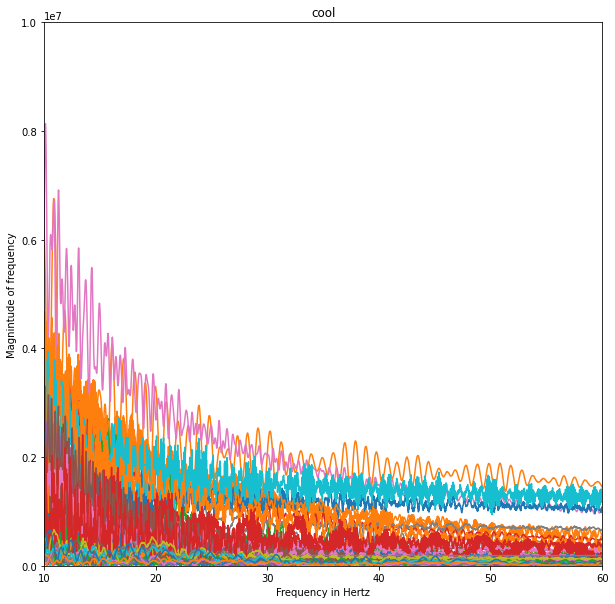

In [43]:

vector1=pd.DataFrame
vector2=pd.DataFrame
vector3=pd.DataFrame
vector4=pd.DataFrame
vector5=pd.DataFrame
vector6=pd.DataFrame
vector7=pd.DataFrame
vector8=pd.DataFrame
vector9=pd.DataFrame
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(nothing,"cool"))
vector1=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,0)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(reading,"cool"))
vector2=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,1)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(calculating,"cool"))
vector3=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,2)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(classical,"cool"))
vector4=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,3)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(classicalreading,"cool"))
vector5=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,4)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(classicalcalculating,"cool"))
vector6=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,5)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(pop,"cool"))
vector7=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,6)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(popreading,"cool"))
vector8=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,7)
df1,df2,df3,df4,df5,df6,df7,df8=get_dataframes(fft_filter(popmath,"cool"))
vector9=make_vector(df1,df2,df3,df4,df5,df6,df7,df8,8)



In [44]:
vertical_stack = pd.concat([vector1, vector2,vector3,vector4,vector5,vector6,vector7,vector8,vector9], axis=0)
len(vertical_stack)

360

In [45]:
vertical_stack.head()

,band,val,Sensor,Label
0,Delta,111.860631,sensor1,0
1,Theta,3817.894311,sensor1,0
2,Alpha,57479.070351,sensor1,0
3,Beta,416064.683201,sensor1,0
4,Gamma,327486.345584,sensor1,0


In [46]:
brain_wave_dict={"Delta":0, "Theta":1,"Alpha":2,"Beta":3, "Gamma":4}


In [47]:
vertical_stack["band"]=vertical_stack["band"].map(brain_wave_dict)


In [48]:
vertical_stack.head()

,band,val,Sensor,Label
0,0,111.860631,sensor1,0
1,1,3817.894311,sensor1,0
2,2,57479.070351,sensor1,0
3,3,416064.683201,sensor1,0
4,4,327486.345584,sensor1,0


In [49]:
X=vertical_stack
len(vertical_stack["Label"])

360

In [50]:
X=X.drop("Sensor",axis=1)
X=X.drop("Label",axis=1)

In [51]:
print(len(vertical_stack["Label"]))

360


In [52]:
pd.get_dummies(X,columns=["band"]).head()
X_encoded=pd.get_dummies(X,columns=["band"])

In [53]:
#y=vertical_stack["Label"]
yarr=[]
for i in range(len(vertical_stack["Label"])):
    yarr.append(vertical_stack.iloc[i]["Label"])
print(len(yarr))

360


In [54]:
actual_y=pd.DataFrame(columns=["Label"])
actual_y["Label"]=yarr


In [55]:
X_train, X_test, y_train, y_test,= train_test_split(X_encoded,yarr, test_size=0.2)

In [103]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(X)
print(len(scaled))

360


In [56]:
#model=svm.SVC(kernel="linear")
#model.fit(X_train, y_train)

In [107]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [112]:
lin_clf.score(X_test,y_test)

0.1111111111111111

In [57]:
print(y_train)


[2, 7, 2, 2, 4, 4, 2, 5, 5, 3, 3, 2, 0, 2, 8, 1, 0, 2, 0, 7, 7, 2, 0, 3, 8, 0, 5, 5, 1, 7, 8, 8, 7, 3, 7, 1, 3, 5, 5, 0, 7, 1, 5, 4, 8, 2, 2, 3, 6, 1, 2, 5, 7, 7, 1, 8, 3, 5, 4, 2, 8, 5, 0, 0, 2, 4, 2, 8, 4, 6, 6, 5, 7, 2, 0, 4, 5, 4, 7, 3, 4, 0, 2, 8, 6, 1, 3, 3, 8, 7, 6, 6, 4, 4, 5, 0, 8, 8, 7, 2, 7, 7, 8, 5, 4, 1, 8, 6, 1, 6, 0, 5, 7, 5, 6, 3, 5, 2, 2, 7, 8, 8, 5, 3, 5, 0, 6, 1, 6, 5, 6, 1, 1, 6, 0, 4, 5, 6, 2, 4, 3, 4, 7, 8, 6, 4, 6, 1, 4, 1, 0, 1, 5, 8, 1, 1, 7, 4, 8, 7, 4, 3, 3, 5, 2, 5, 2, 4, 6, 3, 3, 7, 7, 0, 5, 1, 2, 6, 6, 2, 6, 6, 0, 7, 0, 8, 1, 7, 3, 0, 6, 4, 5, 8, 1, 2, 5, 4, 8, 6, 2, 6, 0, 7, 0, 1, 0, 3, 2, 7, 0, 4, 7, 8, 4, 5, 4, 8, 1, 0, 4, 7, 5, 8, 4, 0, 4, 6, 3, 1, 3, 3, 1, 0, 6, 4, 1, 7, 0, 3, 6, 6, 6, 5, 5, 0, 1, 3, 2, 1, 4, 3, 8, 6, 3, 4, 1, 3, 3, 7, 1, 5, 6, 1, 1, 8, 2, 2, 0, 0, 3, 6, 7, 1, 2, 2, 3, 0, 8, 8, 1, 4, 2, 3, 1, 1, 0, 8]


In [24]:
def get_freq_band(data): 
    fft_vals =data["y"]

# Get frequencies for amplitudes in Hz
    fft_freq = data["Frequency"]

# Define EEG bands
    eeg_bands = {'Delta': (0, 4),
                 'Theta': (4, 8),
                 'Alpha': (8, 12),
                 'Beta': (12, 30),
                 'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

    # Plot the data (using pandas here cause it's easy)
    import pandas as pd
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EEG band")
    ax.set_ylabel("Mean band Amplitude")
    #print(df)
    
    return df
    

In [59]:
def get_mean_bands(data,title): 
    
    df=pd.DataFrame(columns=["val","band"])
    
    Delta=0
    Theta=0
    Alpha=0
    Beta=0
    Gamma=0
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Delta"):
            Delta+=data.iloc[i]["val"] 
            
    Delta=Delta/8 
    
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Theta"):
            Theta+=data.iloc[i]["val"] 
    Theta=Theta/8
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Alpha"):
            Alpha+=data.iloc[i]["val"] 
            
    Alpha=Alpha/8
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Beta"):
            Beta+=data.iloc[i]["val"] 
            
    Beta=Beta/8 
    
    
    for i in range(len(data)):
        if(data.iloc[i]["band"]=="Gamma"):
            Gamma+=data.iloc[i]["val"] 
    Gamma=Gamma/8 
    
    
    #print("Delta is ",Delta)
    #print("Theta is ", Theta)
    #print("Alpha is ", Alpha)
    #print("Beta is ", Beta)
    #print("Gamma is ", Gamma)
    df = pd.DataFrame({"band": ["Delta","Theta","Alpha","Beta","Gamma"], "val": [Delta,Theta,Alpha,Beta,Gamma]})
    #print(df)
    
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EEG band")
    ax.set_ylabel("Mean band Amplitude")
    ax.set_title(title)
    #print(df)
    #return df
    
    
            
            
    
    

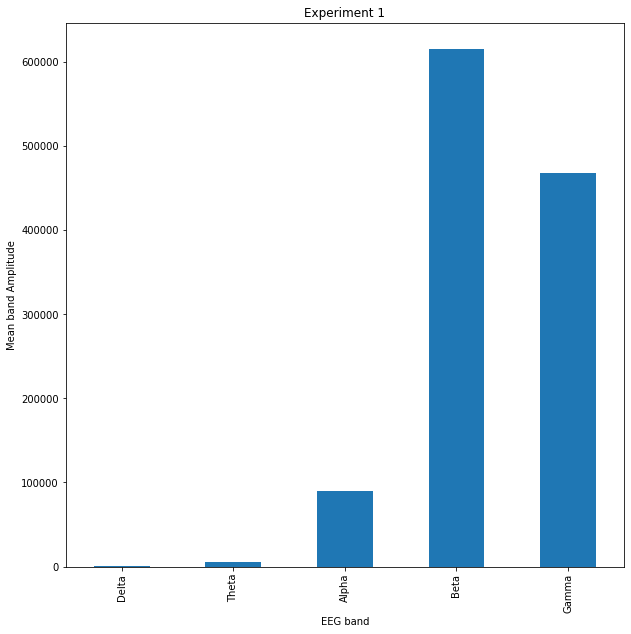

In [60]:
get_mean_bands(vector1,"Experiment 1")

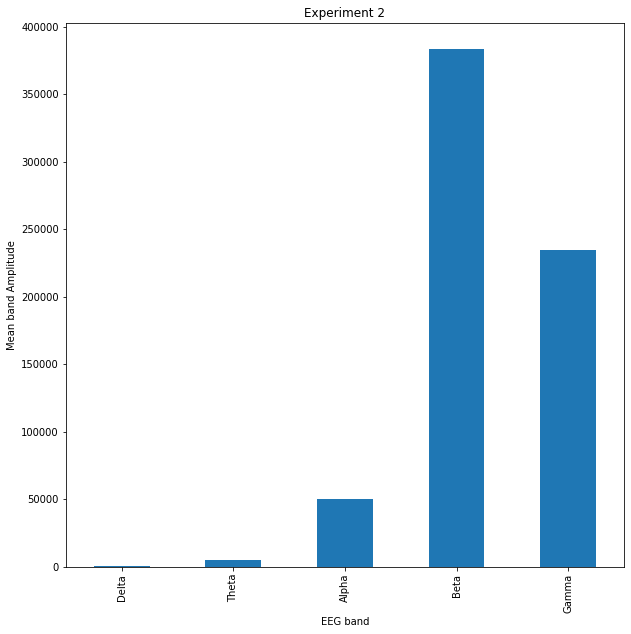

In [61]:
get_mean_bands(vector2,"Experiment 2")

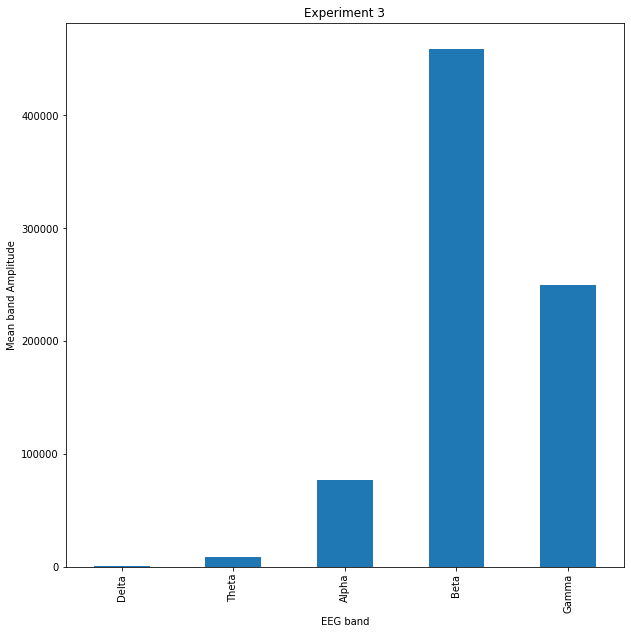

In [62]:
get_mean_bands(vector3,"Experiment 3")

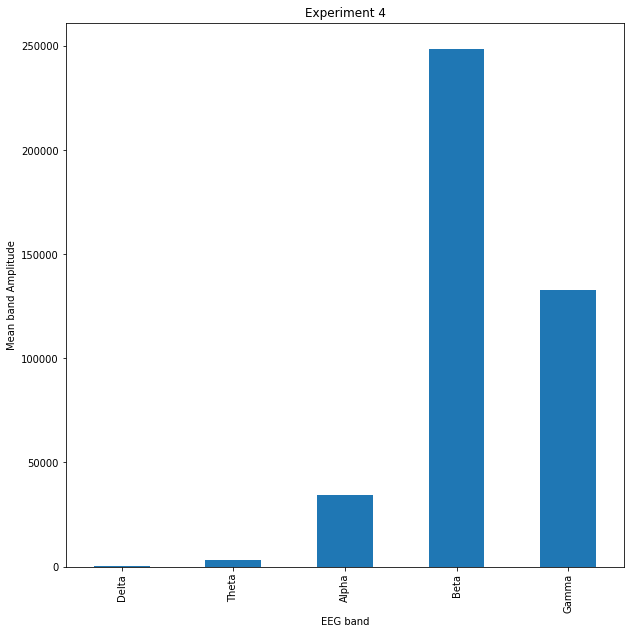

In [63]:
get_mean_bands(vector4,"Experiment 4")

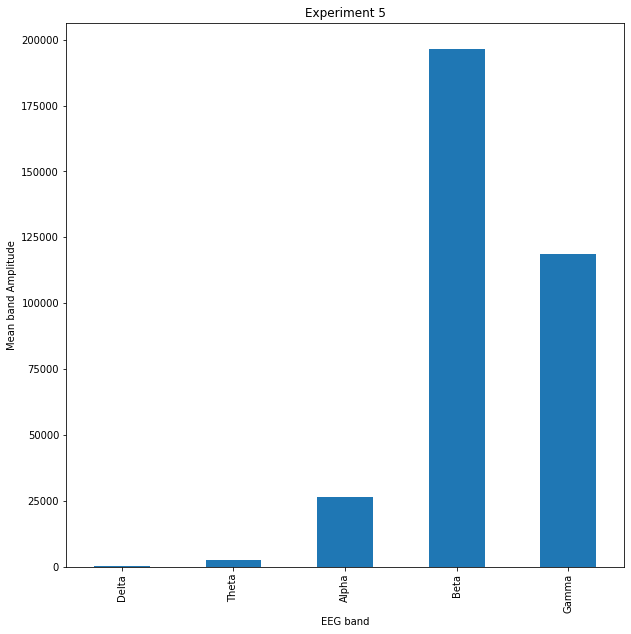

In [64]:
get_mean_bands(vector5,"Experiment 5")

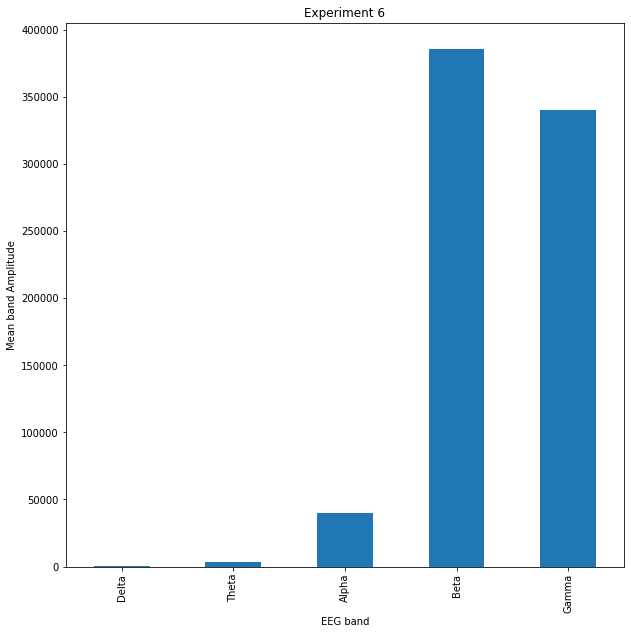

In [65]:
get_mean_bands(vector6,"Experiment 6")

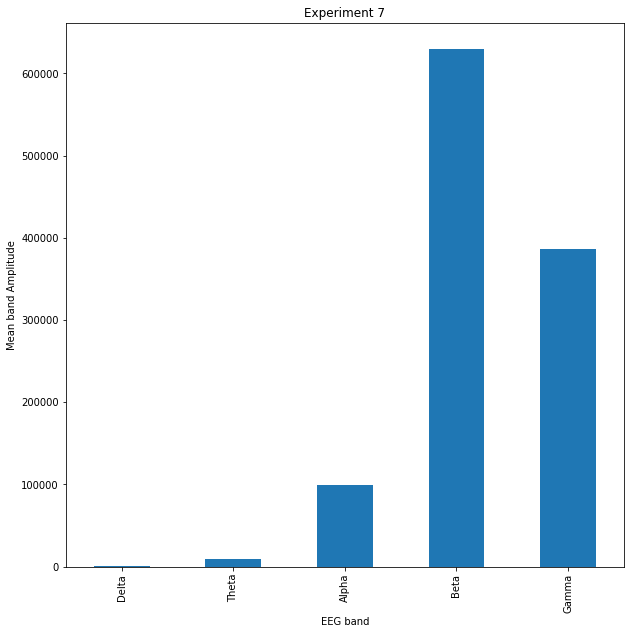

In [66]:
get_mean_bands(vector7,"Experiment 7")

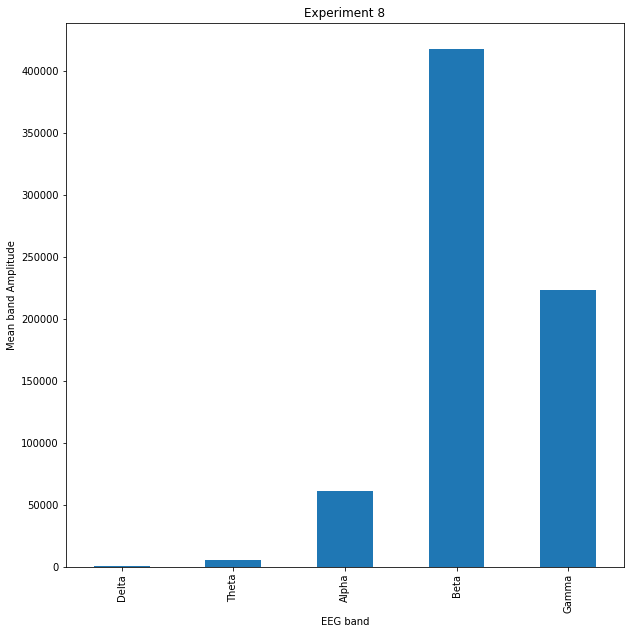

In [67]:
get_mean_bands(vector8,"Experiment 8")

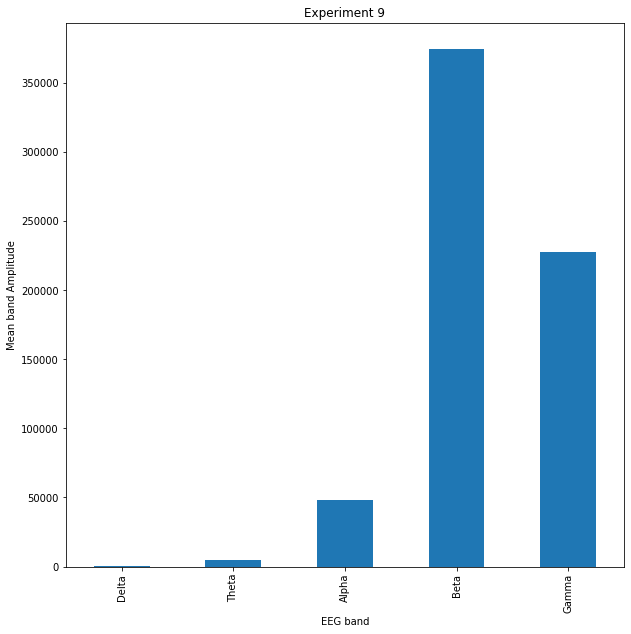

In [68]:
get_mean_bands(vector9,"Experiment 9")

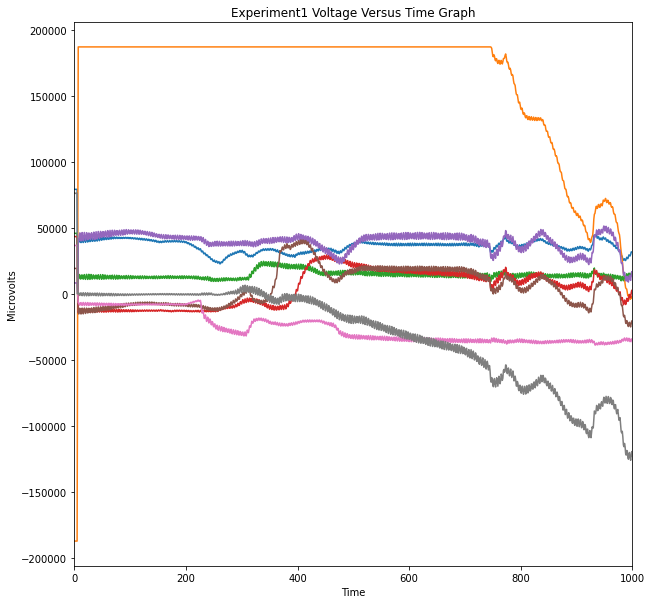

In [69]:
raw_plot_interval(data1,0,1000,"Experiment1 ")

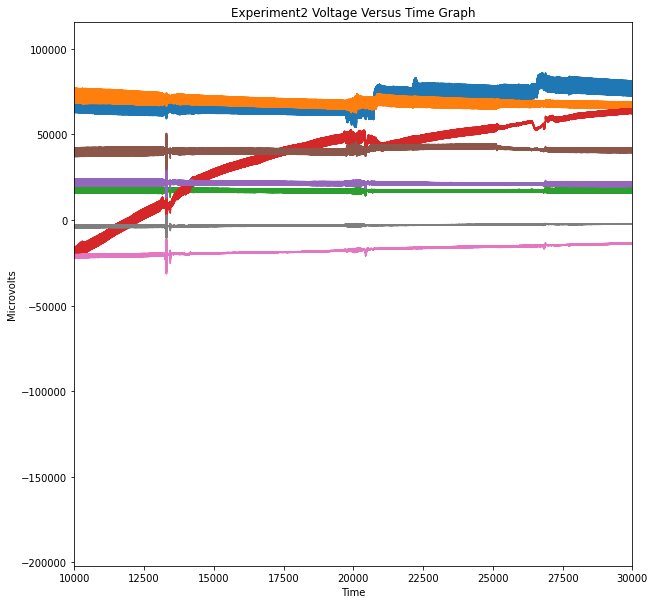

In [70]:
raw_plot_interval(data2,10000,30000,"Experiment2 ")

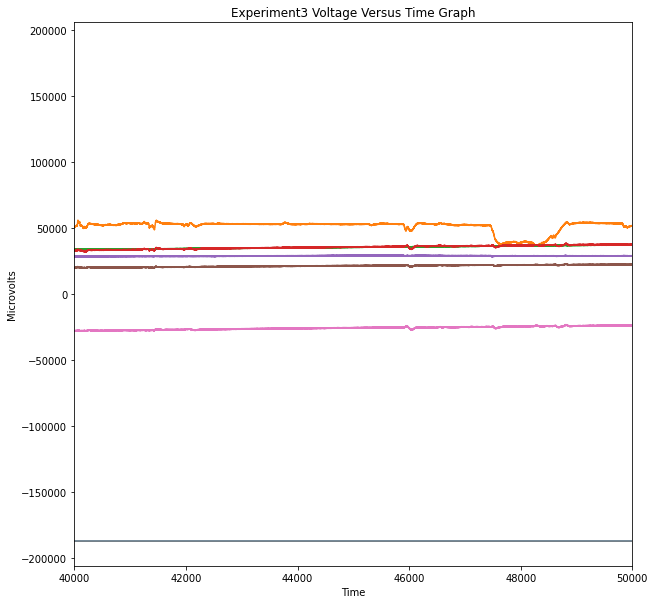

In [71]:
raw_plot_interval(data3,40000,50000,"Experiment3 ")

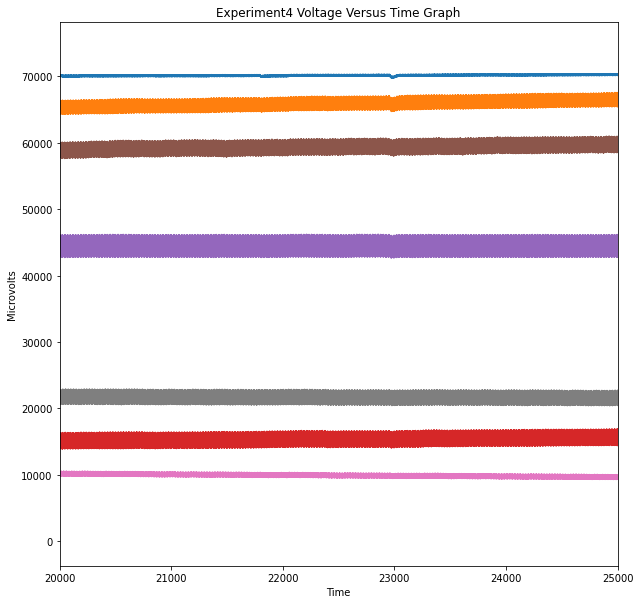

In [72]:
len(data4)
raw_plot_interval(data4,20000,25000,"Experiment4 ")

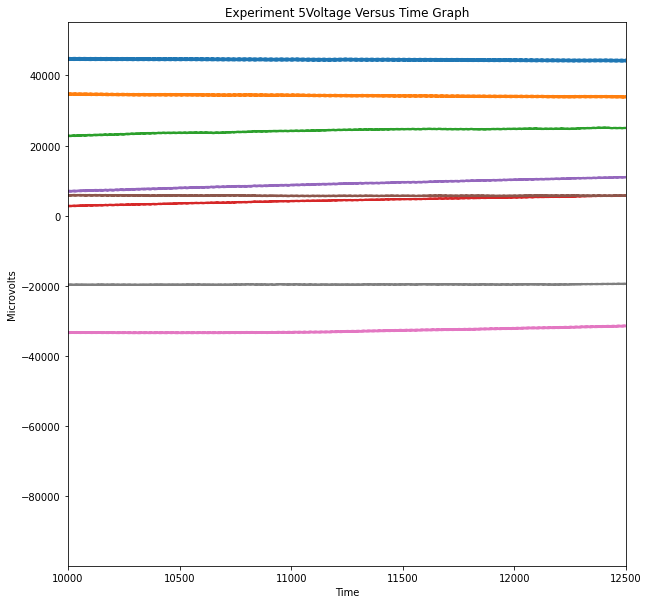

In [73]:
raw_plot_interval(data5,10000,12500,"Experiment 5")

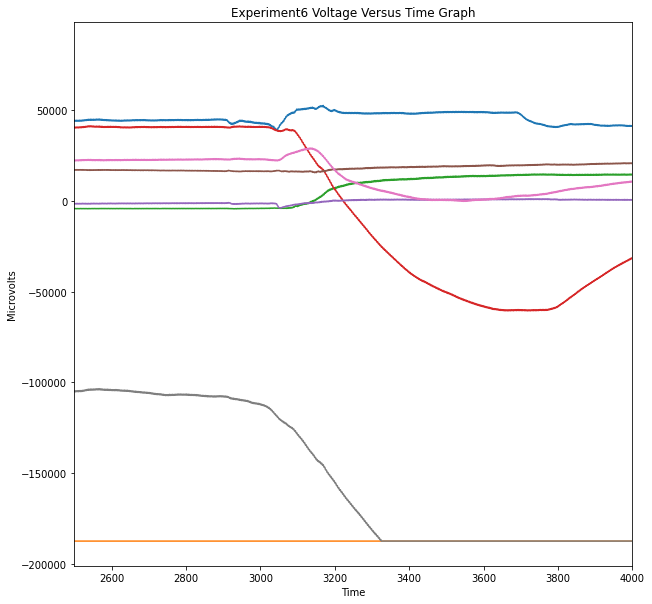

In [74]:
raw_plot_interval(data6,2500,4000,"Experiment6 ")

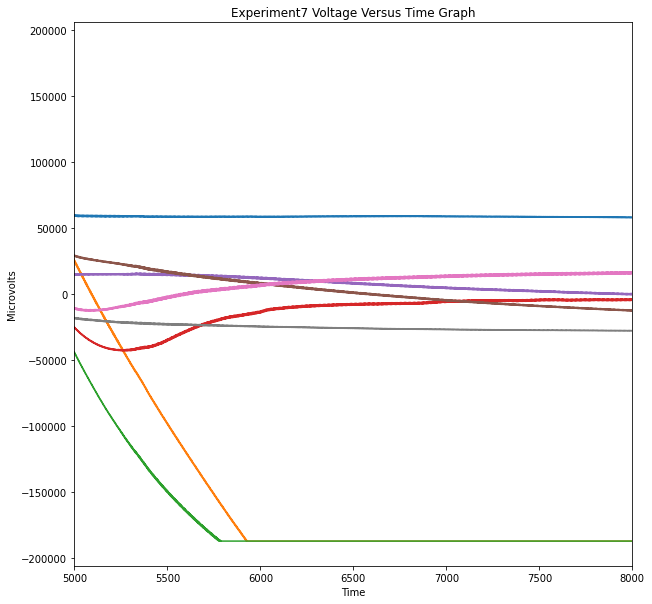

In [75]:
raw_plot_interval(data7,5000,8000,"Experiment7 ")

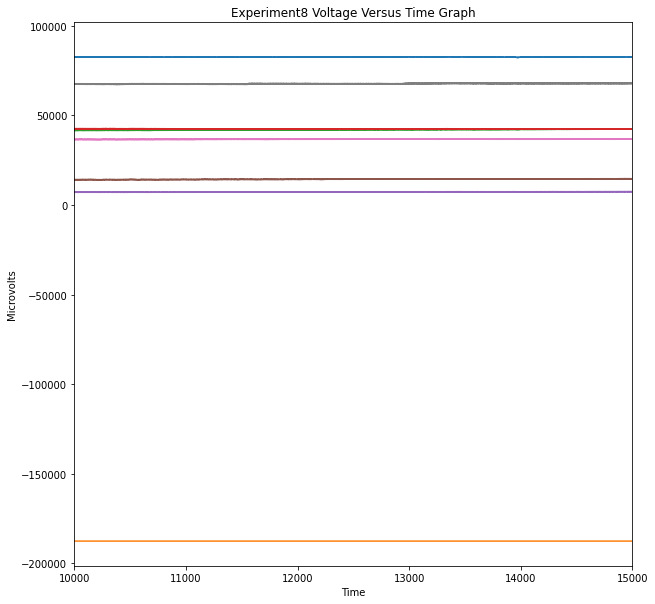

In [76]:
raw_plot_interval(data8,10000,15000, "Experiment8 ")

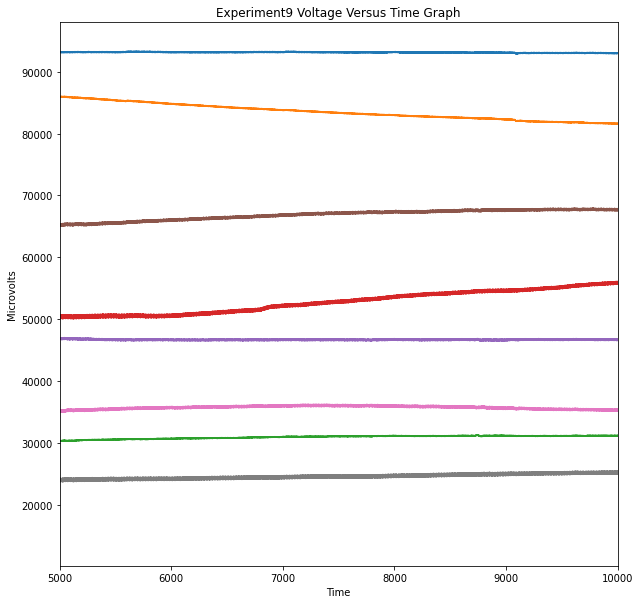

In [77]:
raw_plot_interval(data9,5000,10000,"Experiment9 ")

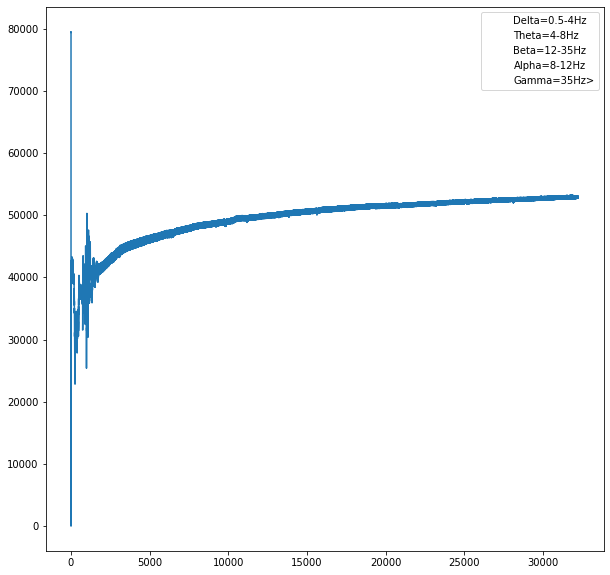

In [78]:

handles, labels = plt.gca().get_legend_handles_labels() # get existing handles and labels
empty_patch = mpatches.Patch(color='none', label='Extra label') # create a patch with no color
handles.append(empty_patch)  # add new patches and labels to list


red_patch = mpatches.Patch(color='none', label="Delta=0.5-4Hz")
blue_patch = mpatches.Patch(color='none', label="Theta=4-8Hz")
alpha_patch = mpatches.Patch(color='none', label="Beta=12-35Hz")
beta_patch = mpatches.Patch(color='none', label="Alpha=8-12Hz")
gamma_patch = mpatches.Patch(color='none', label="Gamma=35Hz>")


plt.legend(handles=[red_patch,blue_patch,alpha_patch,beta_patch,gamma_patch])

plt.plot(data1["EXG Channel 0"])


In [79]:
def plot_single_fft(data, sensor,title):
    channels = []
    
    bandpass_channels =[]
    bandpass_notch_channels = []
    notch_channels = [] 
    fs = 1000
    band = (15,50)
    
    for i in range(8):
        channels.append(data[:,1+i].astype(np.float))
    t = len(channels[0])/fs
    time = np.linspace(0, t, len(channels[0])) 
   
    
    
    
    for i in range(len(channels)):
        notch_channels.append(notch(60,channels[i], fs = fs))
    
    #for i in range(len(notch_channels)):
        #plt.plot(time, notch_channels[i])
    
    
    for i in range(len(channels)):
        bandpass_channels.append(bandpass(band[0],band[1],channels[i], fs = fs))
    
    for i in range(len(notch_channels)):
        bandpass_notch_channels.append(bandpass(band[0],band[1],notch_channels[i], fs = fs)) 
    
    freq, y = fft(bandpass_notch_channels[sensor], fs)
        
        
    handles, labels = plt.gca().get_legend_handles_labels() # get existing handles and labels
    empty_patch = mpatches.Patch(color='none', label='Extra label') # create a patch with no color
    handles.append(empty_patch)  # add new patches and labels to list


    red_patch = mpatches.Patch(color='none', label="Delta=0.5-4Hz")
    blue_patch = mpatches.Patch(color='none', label="Theta=4-8Hz")
    alpha_patch = mpatches.Patch(color='none', label="Beta=12-35Hz")
    beta_patch = mpatches.Patch(color='none', label="Alpha=8-12Hz")
    gamma_patch = mpatches.Patch(color='none', label="Gamma=35Hz>")


    plt.legend(handles=[red_patch,blue_patch,alpha_patch,beta_patch,gamma_patch])
    plt.plot(freq, y)
    plt.ylabel("Magnintude of frequency")
    plt.xlabel("Frequency in Hertz")
    plt.title(title)
    plt.ylim(0, 1e7)
    plt.xlim(10,60) 
   
    

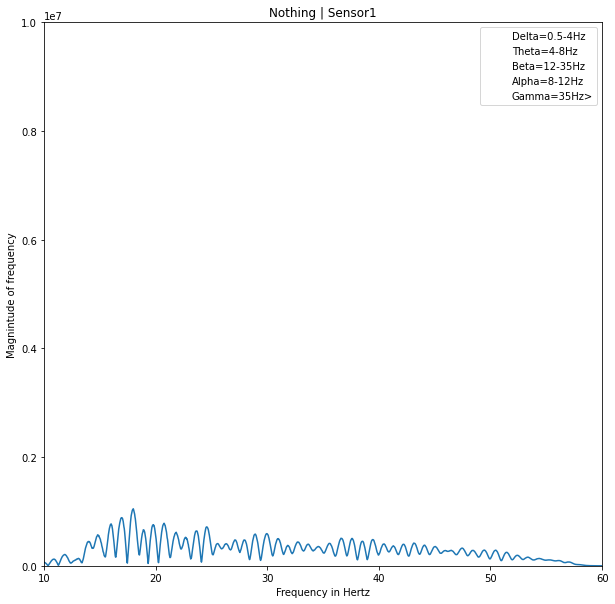

In [80]:
plot_single_fft(nothing,0,"Nothing | Sensor1")

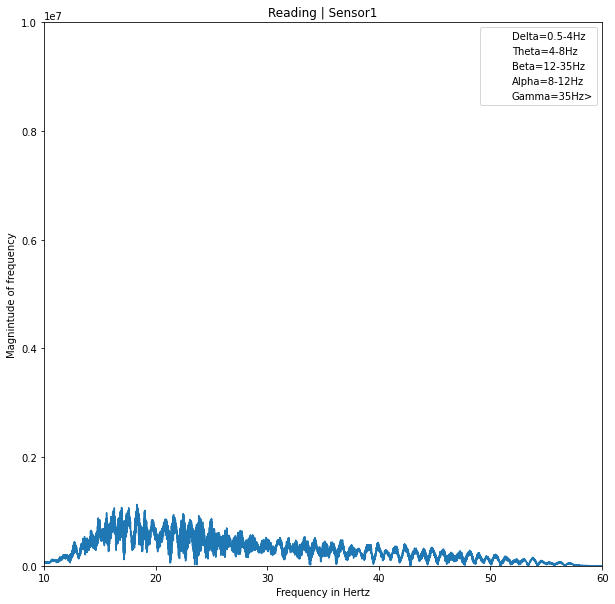

In [81]:
plot_single_fft(reading,0,"Reading | Sensor1")

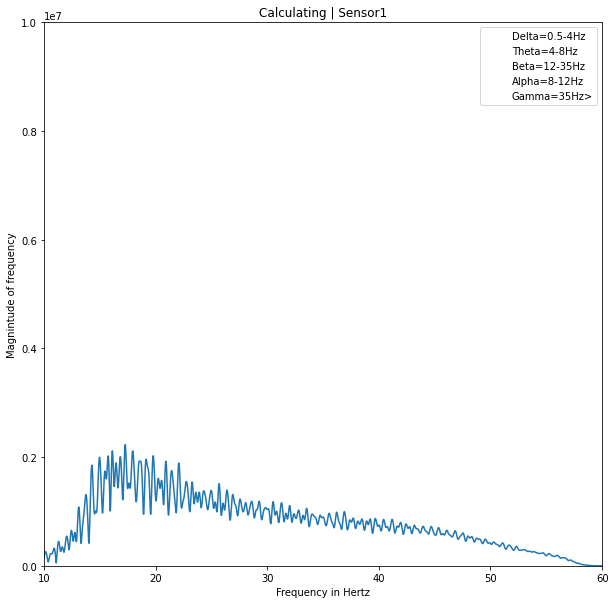

In [82]:
plot_single_fft(calculating,0,"Calculating | Sensor1")

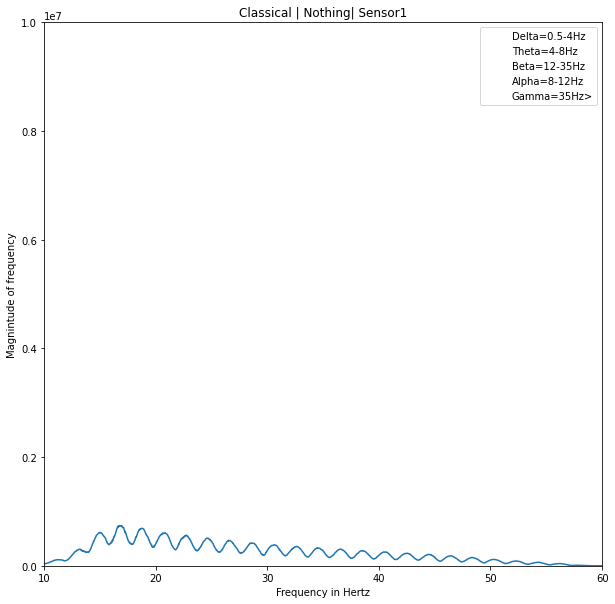

In [83]:
plot_single_fft(classical,0,"Classical | Nothing| Sensor1")

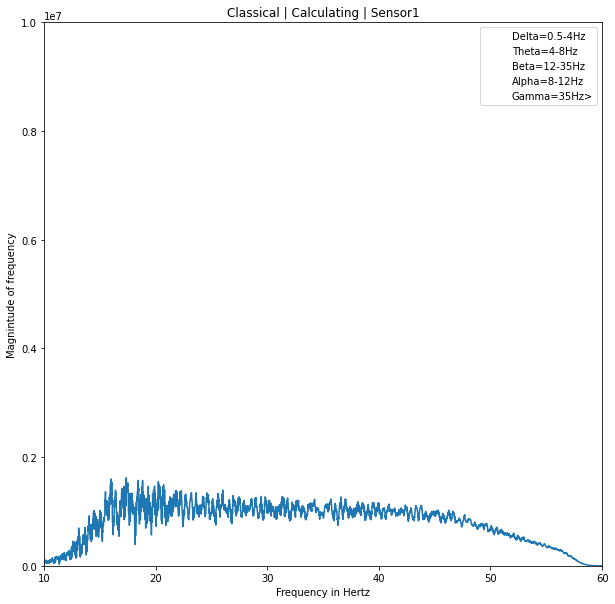

In [84]:
plot_single_fft(classicalcalculating,0, "Classical | Calculating | Sensor1")

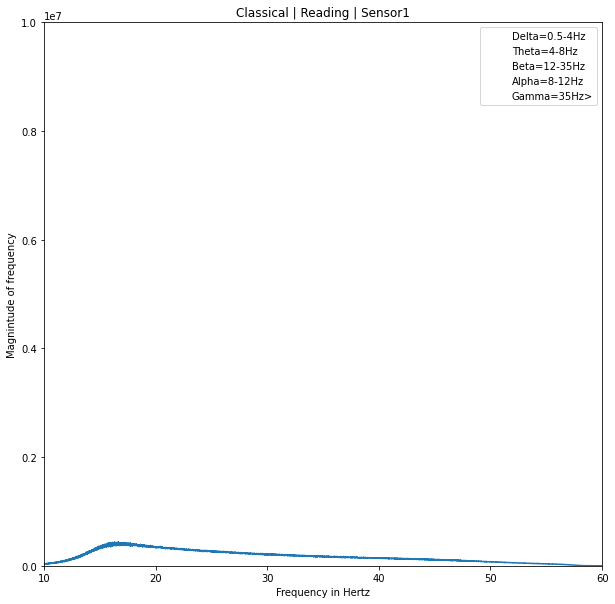

In [85]:
plot_single_fft(classicalreading,0, "Classical | Reading | Sensor1")

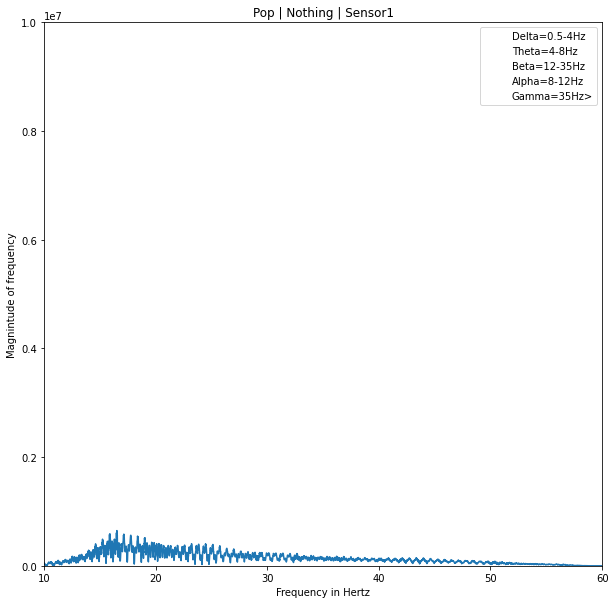

In [86]:
plot_single_fft(pop,0,"Pop | Nothing | Sensor1")

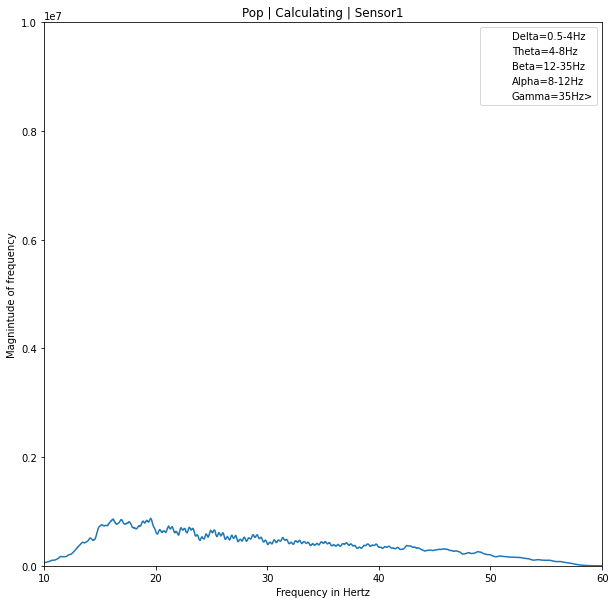

In [87]:
plot_single_fft(popmath,0, "Pop | Calculating | Sensor1")

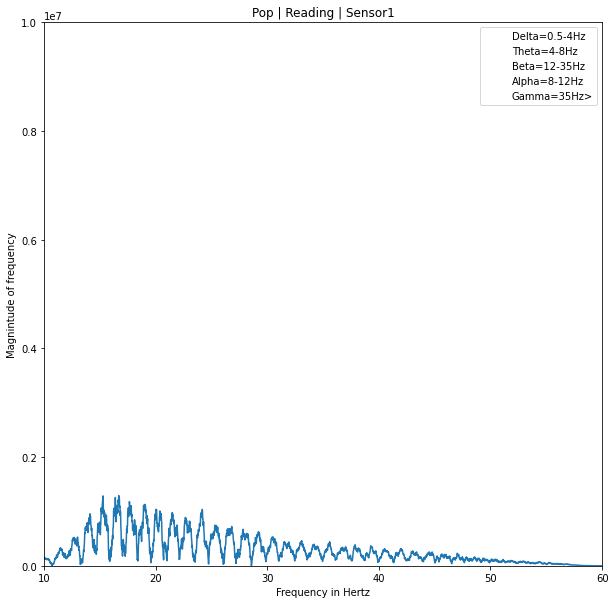

In [88]:
plot_single_fft(popreading, 0, "Pop | Reading | Sensor1")

In [89]:
pop2=clean2("pop2.txt")
pop3=clean2("pop3.txt")
pop4=clean2("pop4.txt")
pop5=clean2("pop5.txt")

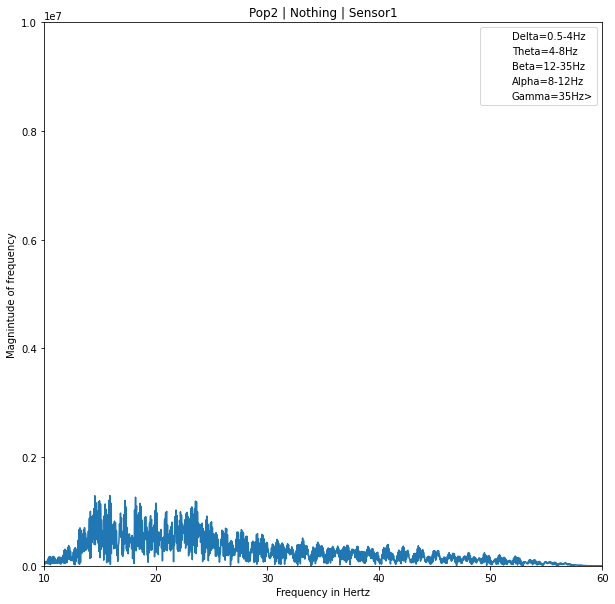

In [90]:
plot_single_fft(pop2,0,"Pop2 | Nothing | Sensor1")

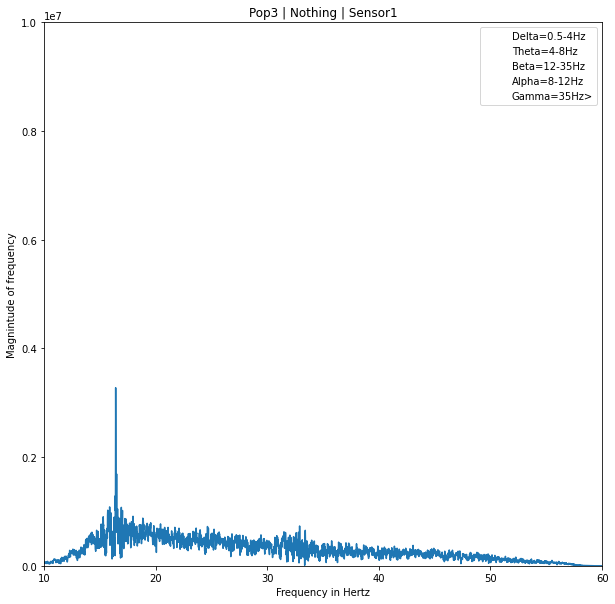

In [91]:
plot_single_fft(pop3,0,"Pop3 | Nothing | Sensor1")

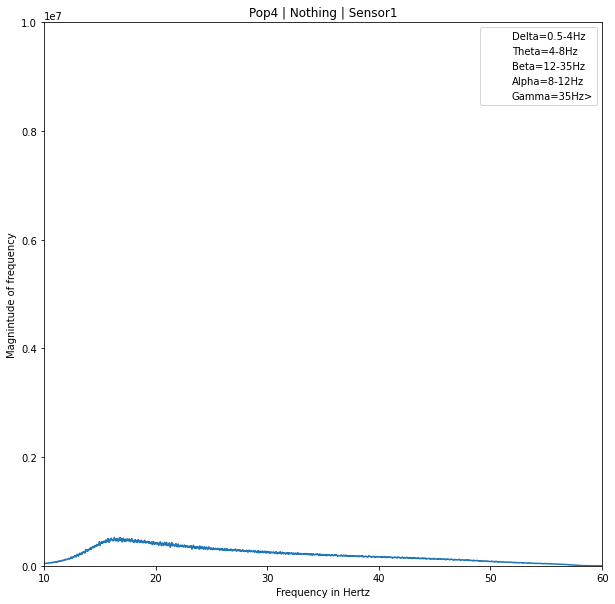

In [92]:
plot_single_fft(pop4,0,"Pop4 | Nothing | Sensor1")

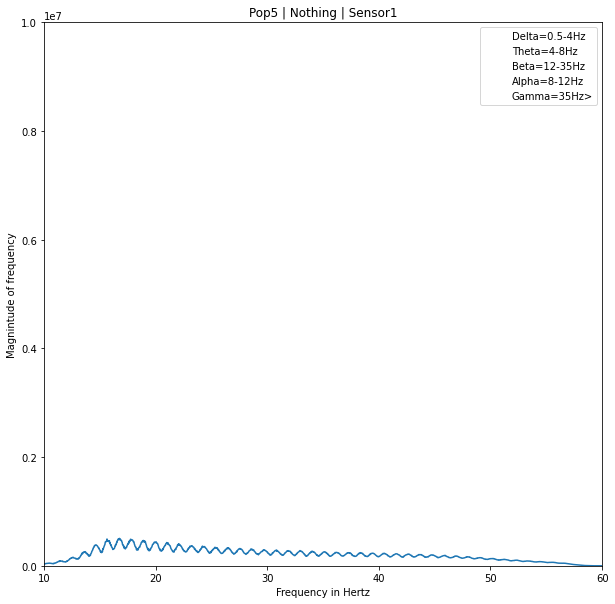

In [93]:
plot_single_fft(pop5,0,"Pop5 | Nothing | Sensor1")